## 2.1.1: Dataset Overview

I loaded the dataset and checked its basic structure and quality.

1. **Dimensions**
   - Printed the number of rows and columns.

2. **Columns and Types**
   - Listed all column names and their data types.
   - Renamed unclear columns (e.g., `Value_NE5`, `Value_NE7`) to more meaningful names.

3. **Time Range**
   - Detected the timestamp column and converted it to datetime.
   - Reported the start and end timestamps.

4. **Sampling Rate**
   - Calculated the most common time difference between consecutive timestamps.

5. **Missing Values**
   - Counted missing values per column and computed missing percentages.


In [2]:
import pandas as pd
import numpy as np

# =========================
# 1) Load Dataset (Original)
# =========================

# Load the raw dataset with original column names
df_old = pd.read_csv("zurich_electricity_consumption.csv")

# Create a working copy and rename columns to meaningful names
df = df_old.copy()

df = df.rename(columns={
    "Value_NE5": "power_ne5",
    "Value_NE7": "power_ne7",
    "Hr [%Hr]": "humidity_pct",
    "RainDur [min]": "rain_duration_min",
    "StrGlo [W/m2]": "global_radiation_wm2",
    "T [°C]": "temperature_c",
    "WD [°]": "wind_direction_deg",
    "WVs [m/s]": "wind_speed_ms",
    "WVv [m/s]": "wind_velocity_ms",
    "p [hPa]": "pressure_hpa",
})

# Convert timestamp to datetime (keep it in df only)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])


In [3]:
# =========================
# Dataset Overview
# =========================

print("===== DATASET SHAPE =====")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

print("\n===== COLUMN NAMES =====")
print(df.columns.tolist())

print("\n===== DATA TYPES =====")
print(df.dtypes)

# -------------------------
# Time Range
# -------------------------
timestamp_col = "Timestamp"  # known timestamp column

print("\n===== TIME RANGE =====")
print("Start:", df[timestamp_col].min())
print("End:", df[timestamp_col].max())

# -------------------------
# Sampling Rate
# -------------------------
time_diffs = df[timestamp_col].sort_values().diff().dropna()

print("\n===== SAMPLING RATE SUMMARY =====")
print(time_diffs.value_counts().head(10))

print("\nMost common sampling interval:")
print(time_diffs.mode()[0])

# -------------------------
# Missing Values Summary
# -------------------------
print("\n===== MISSING VALUES SUMMARY =====")
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_percent
})

display(missing_summary[missing_summary["Missing Count"] > 0])


===== DATASET SHAPE =====
Rows: 268705
Columns: 11

===== COLUMN NAMES =====
['Timestamp', 'power_ne5', 'power_ne7', 'humidity_pct', 'rain_duration_min', 'global_radiation_wm2', 'temperature_c', 'wind_direction_deg', 'wind_speed_ms', 'wind_velocity_ms', 'pressure_hpa']

===== DATA TYPES =====
Timestamp               datetime64[ns]
power_ne5                      float64
power_ne7                      float64
humidity_pct                   float64
rain_duration_min              float64
global_radiation_wm2           float64
temperature_c                  float64
wind_direction_deg             float64
wind_speed_ms                  float64
wind_velocity_ms               float64
pressure_hpa                   float64
dtype: object

===== TIME RANGE =====
Start: 2015-01-01 00:00:00
End: 2022-08-31 00:00:00

===== SAMPLING RATE SUMMARY =====
Timestamp
0 days 00:15:00    268704
Name: count, dtype: int64

Most common sampling interval:
0 days 00:15:00

===== MISSING VALUES SUMMARY =====


Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

## 2.1.2: Basic Statistical Analysis

In this section, I performed basic statistical analysis on the target metric using pandas.

1. **Descriptive Statistics**
   - Used `describe()` to summarize count, mean, std, min/max, and quartiles.

2. **Quantiles**
   - Computed key quantiles (1%, 5%, 25%, 50%, 75%, 95%, 99%) to understand the distribution and extreme values.

3. **Grouped Statistics**
   - Extracted time features from the timestamp (hour and day of week).
   - Calculated the mean consumption by hour and by weekday to check daily/weekly patterns.


In [4]:
# Use the existing dataframe created earlier:
# df_old = original raw columns
# df     = renamed working dataframe

# Choose the main variable for analysis (renamed)
target = "power_ne5"

# =========================
# 1) Descriptive Statistics
# =========================
print("===== BASIC DESCRIPTIVE STATISTICS =====")
display(df[target].describe())

# =========================
# 2) Quantiles
# =========================
print("===== QUANTILES =====")
quantiles = df[target].quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99])
display(quantiles)

# =========================
# 3) Grouped Statistics
# =========================

# Extract time-based features
df["Hour"] = df["Timestamp"].dt.hour
df["DayOfWeek"] = df["Timestamp"].dt.dayofweek  # 0 = Monday

print("===== MEAN BY HOUR =====")
display(df.groupby("Hour")[target].mean())

print("===== MEAN BY DAY OF WEEK =====")
display(df.groupby("DayOfWeek")[target].mean())


===== BASIC DESCRIPTIVE STATISTICS =====


count    268705.000000
mean      25902.104085
std        5471.918989
min       16144.357000
25%       21184.216000
50%       24219.550000
75%       31099.234000
max       42823.047000
Name: power_ne5, dtype: float64

===== QUANTILES =====


0.01    17846.62640
0.05    19029.68880
0.25    21184.21600
0.50    24219.55000
0.75    31099.23400
0.95    35029.13160
0.99    36828.91548
Name: power_ne5, dtype: float64

===== MEAN BY HOUR =====


Hour
0     19941.667426
1     19579.885911
2     19568.807971
3     20501.347927
4     23108.145593
5     26085.154682
6     28164.015554
7     29268.684152
8     29951.312519
9     30313.058879
10    30326.194146
11    30233.755588
12    30122.831679
13    29987.107209
14    29802.018204
15    29327.348279
16    28497.593875
17    27442.022375
18    26059.750279
19    24484.054807
20    23307.196128
21    22539.079900
22    22029.904108
23    21010.093227
Name: power_ne5, dtype: float64

===== MEAN BY DAY OF WEEK =====


DayOfWeek
0    27108.308740
1    27814.533418
2    27889.741915
3    27773.746115
4    27347.356956
5    22600.936040
6    20785.022745
Name: power_ne5, dtype: float64

## 2.1.3: Original Data Quality Analysis

Here I checked the raw data quality before cleaning.

- **Missing values:** counts + a plot to see missingness patterns  
- **Outliers:** detected and visualized extreme values  
- **Duplicates:** checked duplicate rows and duplicate timestamps  
- **Timestamp gaps:** looked for irregular time intervals and big gaps  
- **Invalid ranges/units:** flagged values outside realistic physical limits


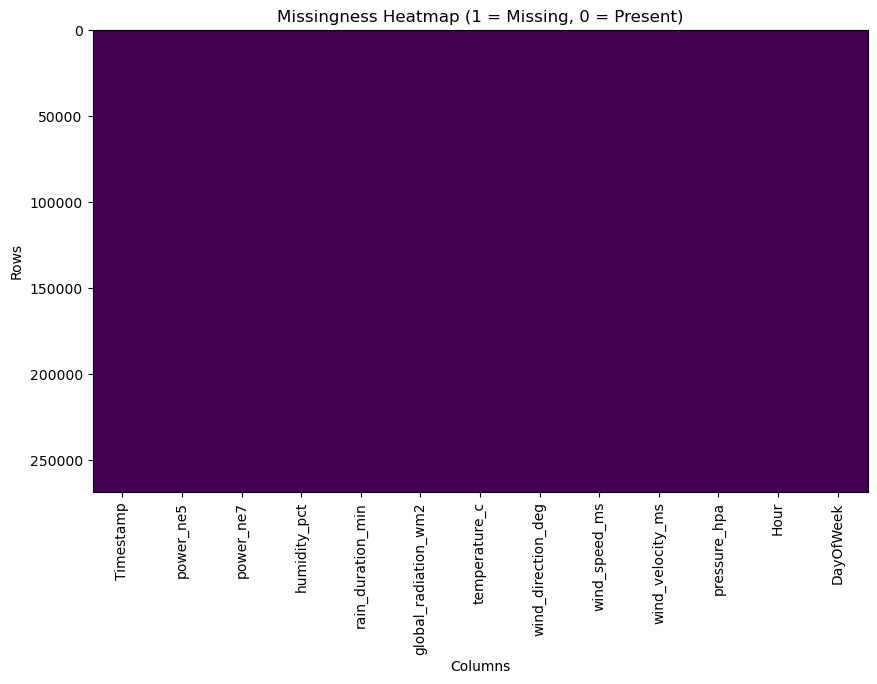

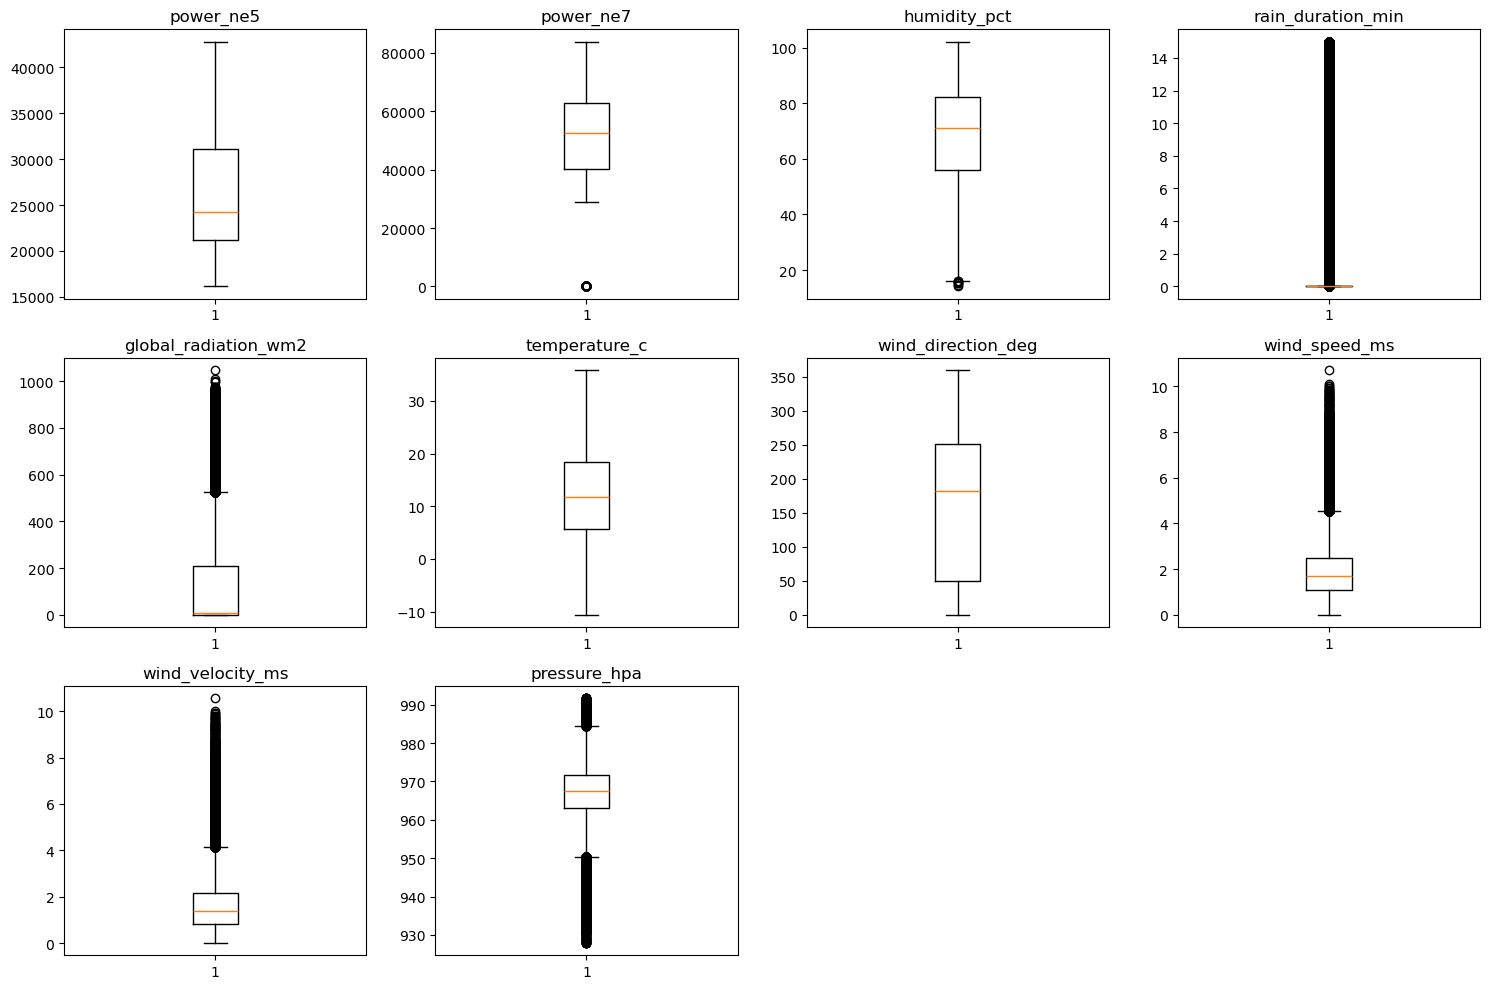

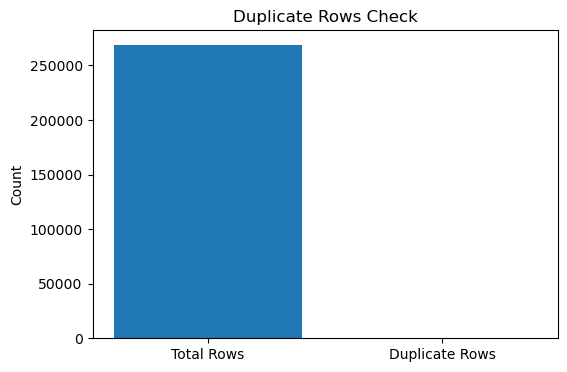

Total Rows: 268705
Duplicate Rows: 0
Duplicate Timestamps: 0


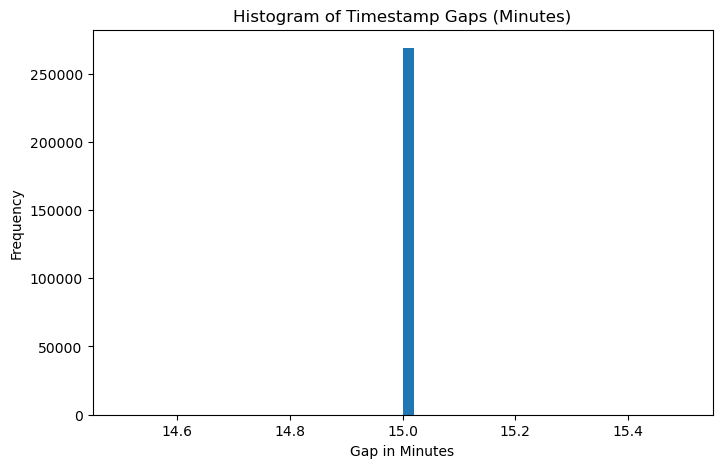

Most common sampling interval (minutes): 15.0


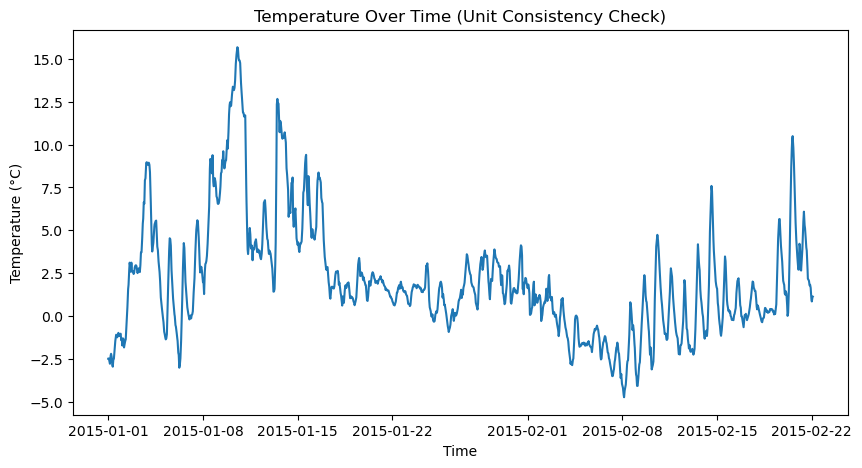

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Use the existing dataframe created earlier:
# df_old = original raw columns
# df     = renamed working dataframe (recommended for all analysis)

# Make sure data is sorted by time (Timestamp already datetime from your first cell)
df = df.sort_values("Timestamp").reset_index(drop=True)

# =========================
# 1) Missingness Pattern Heatmap
# =========================
missing_matrix = df.isnull().values.astype(int)

plt.figure(figsize=(10, 6))
plt.imshow(missing_matrix, aspect="auto")
plt.title("Missingness Heatmap (1 = Missing, 0 = Present)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.show()

# =========================
# 2) Outliers Detection (Boxplot)
# =========================
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(df[col].dropna(), showfliers=True)
    plt.title(col)

plt.tight_layout()
plt.show()

# =========================
# 3) Duplicate Rows Check
# =========================
total_rows = len(df)
duplicate_rows = df.duplicated().sum()
duplicate_timestamps = df["Timestamp"].duplicated().sum()

plt.figure(figsize=(6, 4))
plt.bar(["Total Rows", "Duplicate Rows"], [total_rows, duplicate_rows])
plt.title("Duplicate Rows Check")
plt.ylabel("Count")
plt.show()

print("Total Rows:", total_rows)
print("Duplicate Rows:", duplicate_rows)
print("Duplicate Timestamps:", duplicate_timestamps)

# =========================
# 4) Timestamp Gaps Histogram
# =========================
time_diffs = df["Timestamp"].diff().dropna()
time_diffs_minutes = time_diffs.dt.total_seconds() / 60

plt.figure(figsize=(8, 5))
plt.hist(time_diffs_minutes, bins=50)
plt.title("Histogram of Timestamp Gaps (Minutes)")
plt.xlabel("Gap in Minutes")
plt.ylabel("Frequency")
plt.show()

print("Most common sampling interval (minutes):", time_diffs_minutes.mode()[0])

# =========================
# 5) Inconsistent Units / Range Sanity Check
# Example: Temperature over time (renamed column)
# =========================
sample_df = df.iloc[:5000]  # small sample for visualization

plt.figure(figsize=(10, 5))
plt.plot(sample_df["Timestamp"], sample_df["temperature_c"])
plt.title("Temperature Over Time (Unit Consistency Check)")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.show()


## 2.1.4: Data Preprocessing Pipeline

In this section, I prepared the dataset for analysis.

- Cleaned invalid/out-of-range values using realistic physical limits  
- Treated zero power readings as missing values  
- Handled duplicate timestamps by aggregating (mean)  
- Removed outliers using the IQR rule (separately for day and night)  
- Filled missing values using limited linear interpolation + edge filling  
- Resampled the data to hourly resolution  
- Created basic features (lag and rolling mean) for the target variable


In [6]:
import numpy as np
import pandas as pd

# =========================================================
# Helper Functions
# =========================================================

def remove_outliers_iqr(data: pd.DataFrame, column: str) -> pd.Series:
    """Replace outliers with NaN using the IQR method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    valid_mask = (data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)
    return data[column].where(valid_mask, np.nan)


def handle_missing_values(data: pd.DataFrame, column: str, max_gap: int = 8) -> pd.Series:
    """Interpolate missing values with a limited maximum gap size."""
    return data[column].interpolate(method="linear", limit=max_gap)


# =========================================================
# Main Preprocessing Pipeline (using renamed columns)
# =========================================================

def preprocess_zurich_data(df_in: pd.DataFrame):
    """
    Preprocessing pipeline:
    - Invalid physical values -> NaN
    - Zero power readings -> NaN
    - Duplicate timestamp handling
    - Day/Night-aware outlier removal -> NaN (IQR)
    - Missing interpolation + edge filling
    - Resampling to hourly
    - Basic feature engineering (lag + rolling mean)
    """

    df_original = df_in.copy()
    df_cleaned = df_in.copy()

    # --- Sort and set Timestamp index (Timestamp already datetime from first cell) ---
    df_cleaned = df_cleaned.sort_values("Timestamp").set_index("Timestamp")

    # --- Define valid physical ranges (using NEW names) ---
    valid_ranges = {
        "power_ne5": (0, 50000),
        "power_ne7": (0, 100000),
        "humidity_pct": (0, 100),
        "rain_duration_min": (0, 60),
        "global_radiation_wm2": (0, 1500),
        "temperature_c": (-30, 50),
        "wind_direction_deg": (0, 360),
        "wind_speed_ms": (0, 50),
        "wind_velocity_ms": (0, 50),
        "pressure_hpa": (800, 1100),
    }

    metric_cols = list(valid_ranges.keys())

    # =================================================
    # 1) Invalid values -> NaN
    # =================================================
    for col, (low, high) in valid_ranges.items():
        if col in df_cleaned.columns:
            invalid_mask = (df_cleaned[col] < low) | (df_cleaned[col] > high)
            df_cleaned.loc[invalid_mask, col] = np.nan

    # =================================================
    # 2) Zero power readings -> NaN
    # =================================================
    for col in ["power_ne5", "power_ne7"]:
        if col in df_cleaned.columns:
            df_cleaned.loc[df_cleaned[col] == 0, col] = np.nan

    # =================================================
    # 3) Handle duplicate timestamps
    # =================================================
    if df_cleaned.index.has_duplicates:
        df_cleaned = df_cleaned.groupby(df_cleaned.index).mean()

    # =================================================
    # 4) Day/Night-aware outlier removal (IQR) -> NaN
    # =================================================
    df_cleaned["hour"] = df_cleaned.index.hour
    df_cleaned["is_night"] = (df_cleaned["hour"] >= 18) | (df_cleaned["hour"] < 6)

    for col in metric_cols:
        if col in df_cleaned.columns:
            for night_flag in [True, False]:
                mask = df_cleaned["is_night"] == night_flag
                if mask.sum() > 20:
                    df_cleaned.loc[mask, col] = remove_outliers_iqr(df_cleaned.loc[mask], col)

    df_cleaned = df_cleaned.drop(columns=["hour", "is_night"])

    # =================================================
    # 5) Handle missing values (interpolation + edge fill)
    # =================================================
    for col in metric_cols:
        if col in df_cleaned.columns:
            df_cleaned[col] = handle_missing_values(df_cleaned, col, max_gap=8)

    df_cleaned = df_cleaned.ffill().bfill()

    # =================================================
    # 6) Resampling (to hourly)
    # =================================================
    df_hourly = df_cleaned.resample("h").mean()

    # =================================================
    # 7) Feature Engineering (target = power_ne5)
    # =================================================
    target = "power_ne5"

    df_hourly["lag_1h"] = df_hourly[target].shift(1)
    df_hourly["rolling_3h_mean"] = df_hourly[target].rolling(window=3).mean()

    df_hourly = df_hourly.dropna()

    return df_original, df_cleaned, df_hourly


# =========================================================
# Run Pipeline (NO re-loading)
# =========================================================

# Use df (renamed) that you already created in the first cell
df_original, df_cleaned, df_hourly = preprocess_zurich_data(df)

print("Original shape:", df_original.shape)
print("Cleaned shape:", df_cleaned.shape)
print("Hourly + Feature Engineered shape:", df_hourly.shape)
print("Missing values after full preprocessing:", df_hourly.isnull().sum().sum())
print(" Full preprocessing pipeline completed successfully.")


Original shape: (268705, 13)
Cleaned shape: (268705, 12)
Hourly + Feature Engineered shape: (67175, 14)
Missing values after full preprocessing: 0
 Full preprocessing pipeline completed successfully.


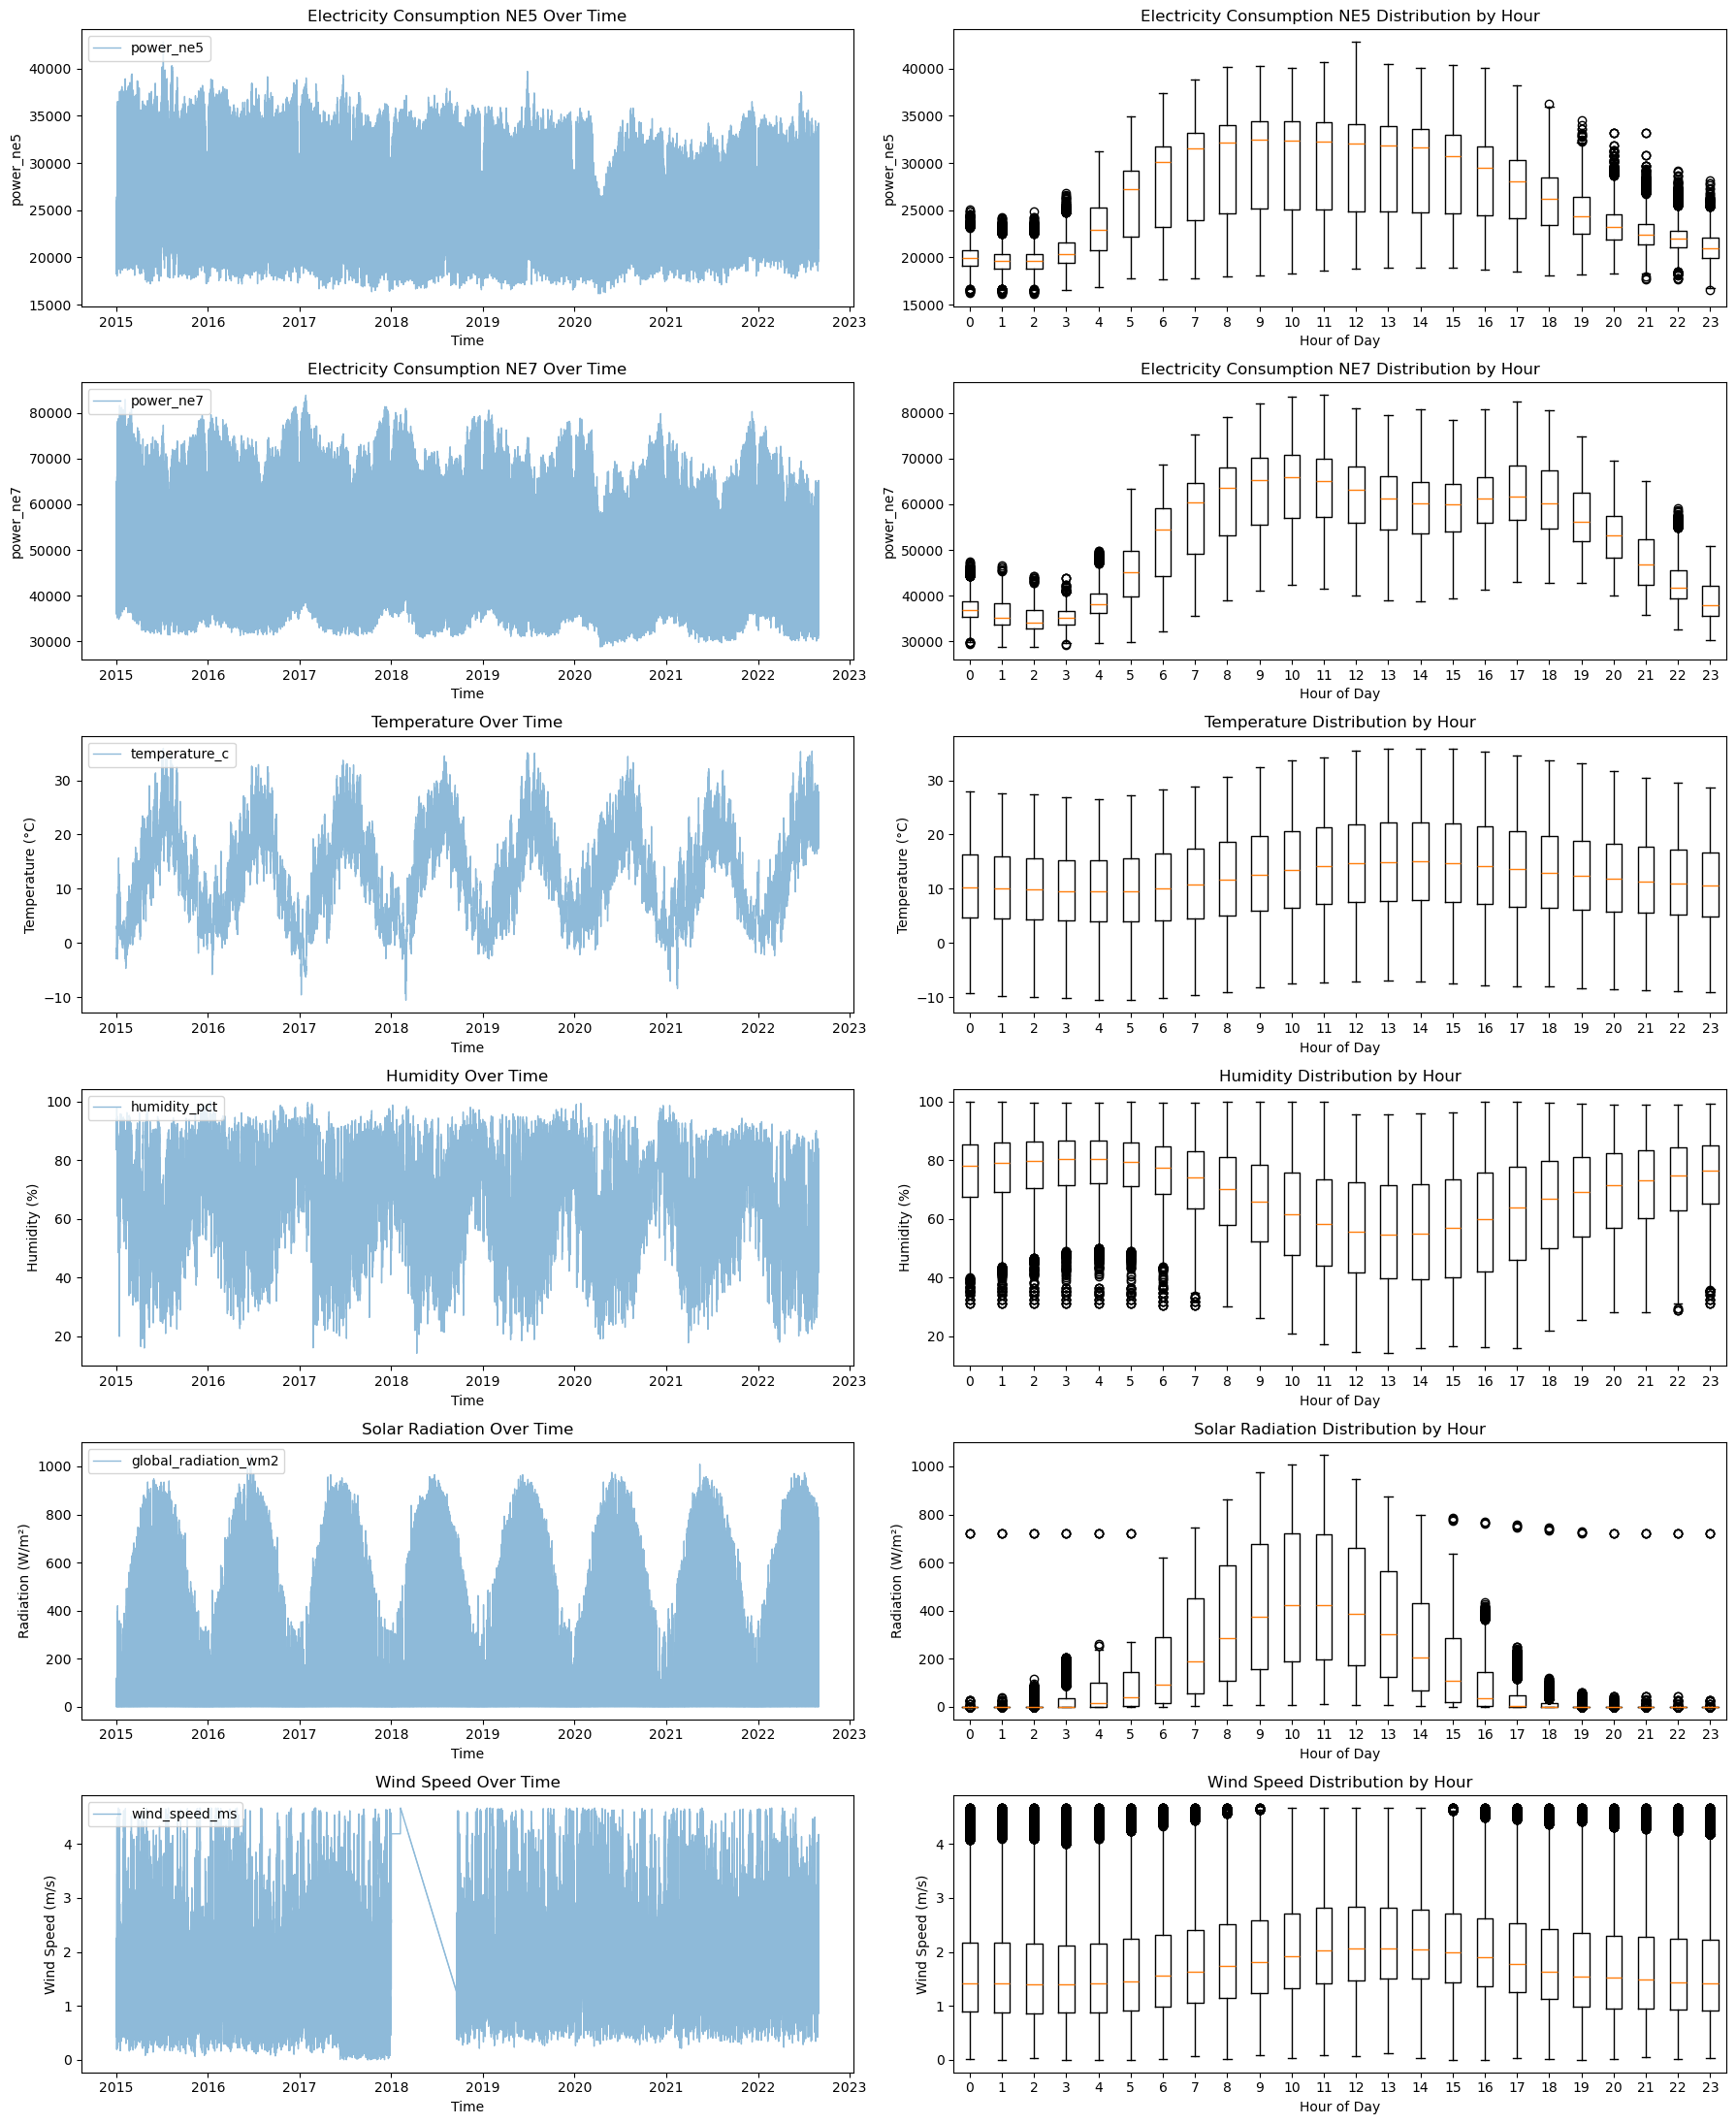

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# =========================
# Use cleaned data (after preprocessing)
# =========================
df_plot = df_cleaned.copy()

# Ensure Timestamp is the index (avoid KeyError)
if "Timestamp" in df_plot.columns:
    df_plot["Timestamp"] = pd.to_datetime(df_plot["Timestamp"])
    df_plot = df_plot.set_index("Timestamp")
else:
    df_plot = df_plot.sort_index()

# =========================
# Define Metrics to Plot (NEW NAMES)
# =========================
metrics = [
    "power_ne5",
    "power_ne7",
    "temperature_c",
    "humidity_pct",
    "global_radiation_wm2",
    "wind_speed_ms"
]

titles = [
    "Electricity Consumption NE5",
    "Electricity Consumption NE7",
    "Temperature",
    "Humidity",
    "Solar Radiation",
    "Wind Speed"
]

ylabels = [
    "power_ne5",
    "power_ne7",
    "Temperature (°C)",
    "Humidity (%)",
    "Radiation (W/m²)",
    "Wind Speed (m/s)"
]

# =========================
# Availability Proxy
# =========================
# Available if power_ne5 is not NaN
df_plot["available"] = df_plot["power_ne5"].notna().astype(int)

# =========================
# Time Features
# =========================
df_plot["hour"] = df_plot.index.hour

# =========================
# Create Figure Grid
# =========================
fig, axes = plt.subplots(len(metrics), 2, figsize=(18, 22))

# =========================================================
# 1) Time Series Overview
# =========================================================
for ax, metric, title, ylabel in zip(axes[:, 0], metrics, titles, ylabels):

    ax.plot(df_plot.index, df_plot[metric], alpha=0.5, linewidth=1, label=metric)

    # Highlight unavailable periods (if any)
    unavailable = df_plot["available"] == 0
    if unavailable.sum() > 0:
        ax.plot(df_plot.index[unavailable], df_plot[metric][unavailable], linewidth=2)

    ax.set_title(title + " Over Time")
    ax.set_xlabel("Time")
    ax.set_ylabel(ylabel)
    ax.legend(loc="upper left")

# =========================================================
# 2) Daily Distribution by Hour (Boxplots)
# =========================================================
df_available = df_plot[df_plot["available"] > 0]

for ax, metric, title, ylabel in zip(axes[:, 1], metrics, titles, ylabels):

    hourly_data = [df_available[df_available["hour"] == h][metric].dropna() for h in range(24)]

    ax.boxplot(hourly_data)
    ax.set_title(title + " Distribution by Hour")
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(1, 25))
    ax.set_xticklabels(range(0, 24))

plt.tight_layout()
plt.show()


## 2.1.5 Preprocessed vs Original Comparison

In this section, I compared the dataset before and after preprocessing.

- I used boxplots to compare the distributions (Original vs Cleaned vs Hourly).
- I used time-series plots to see how cleaning and hourly resampling changed the signals.
- This shows what changed after removing invalid values/outliers and applying resampling.


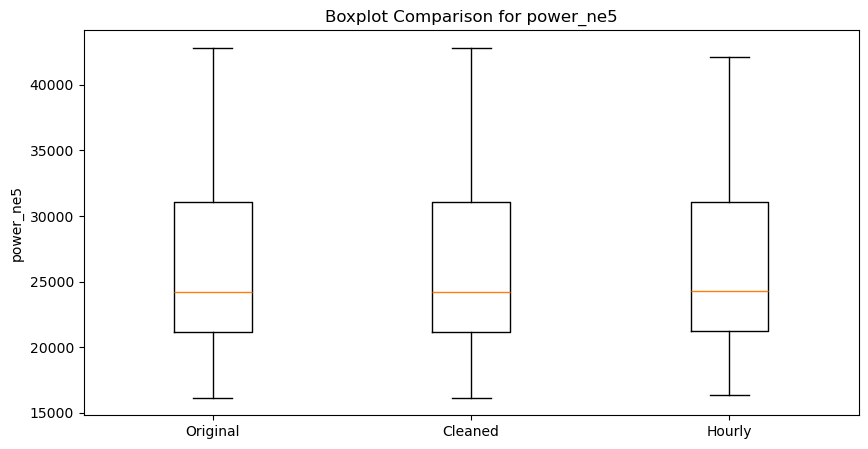

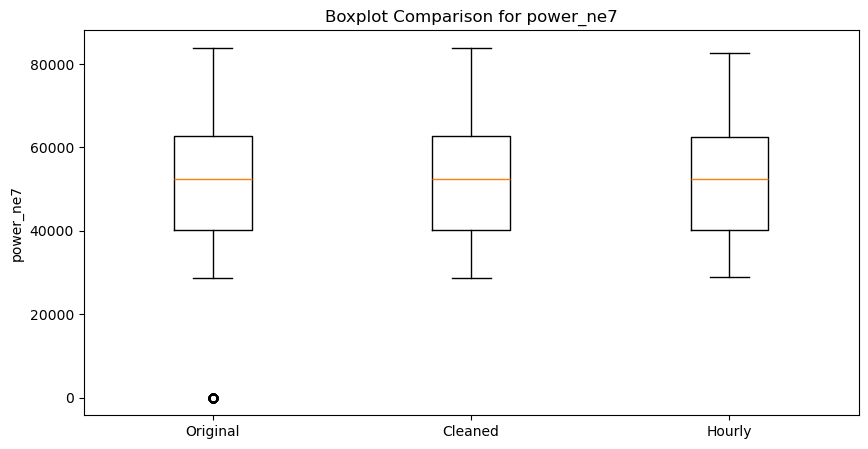

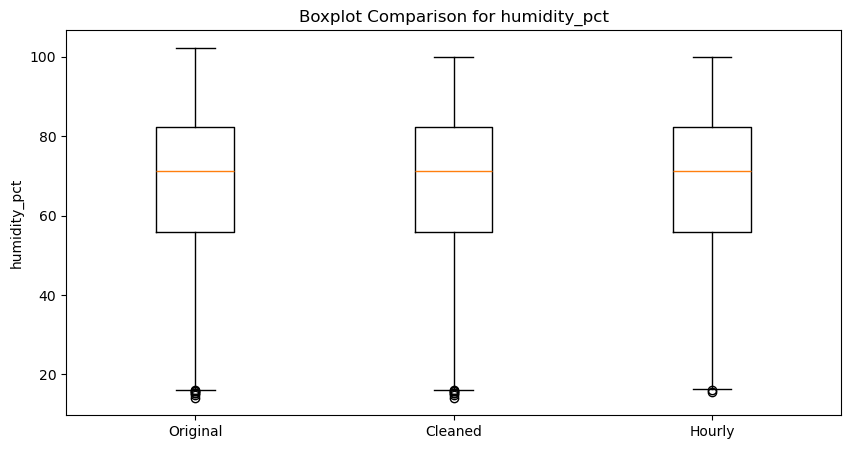

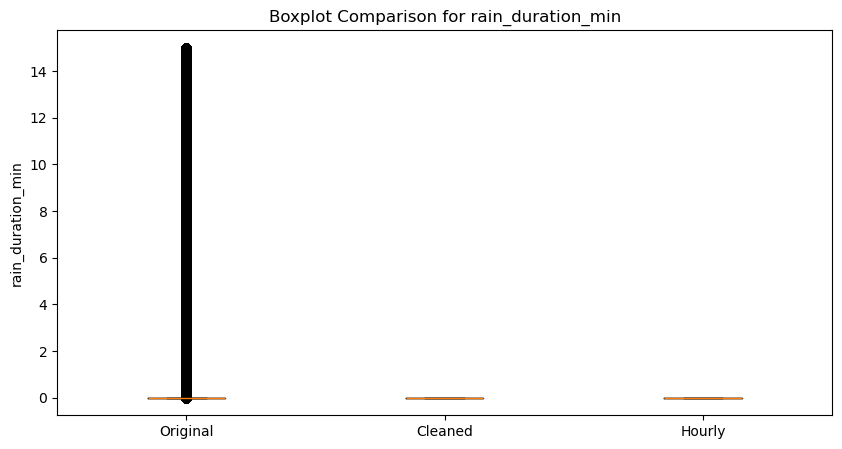

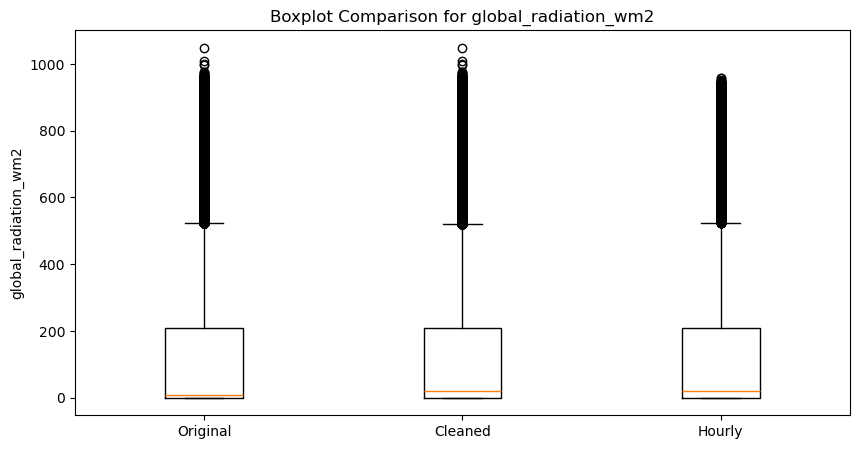

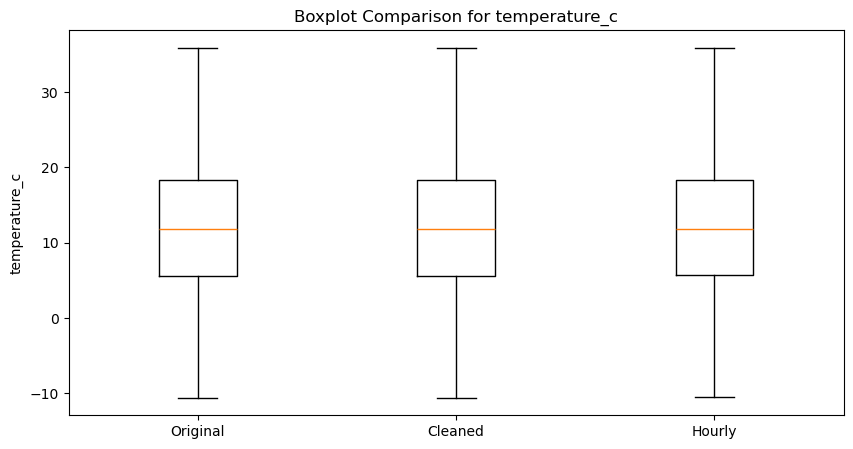

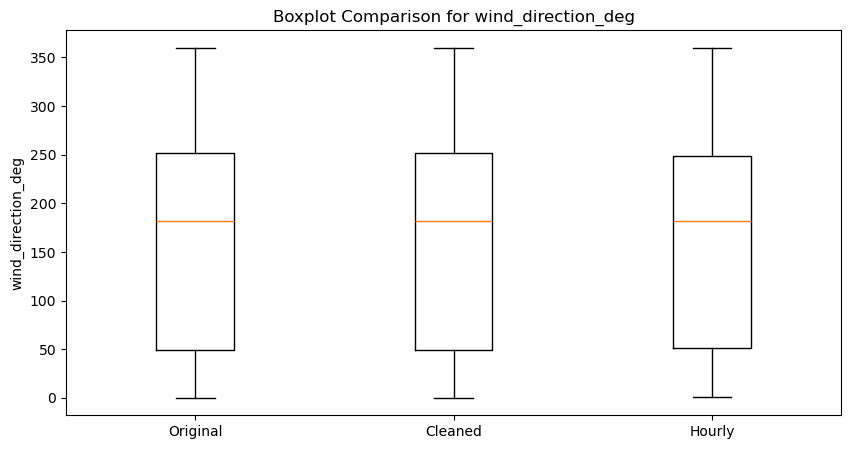

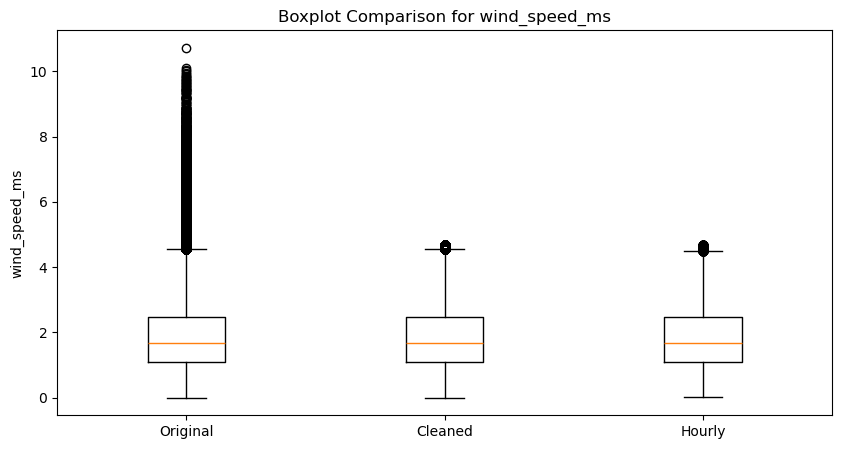

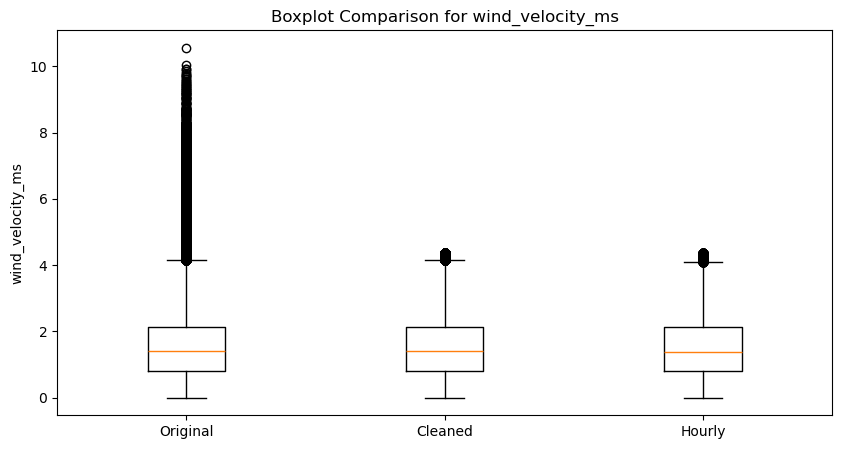

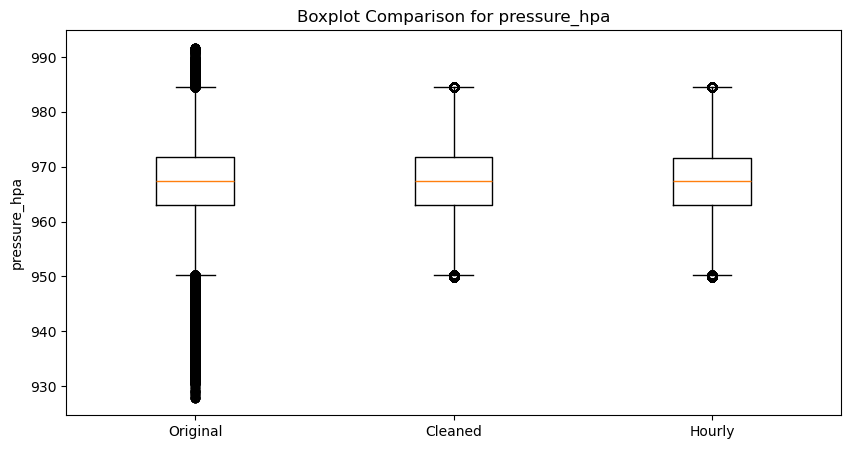

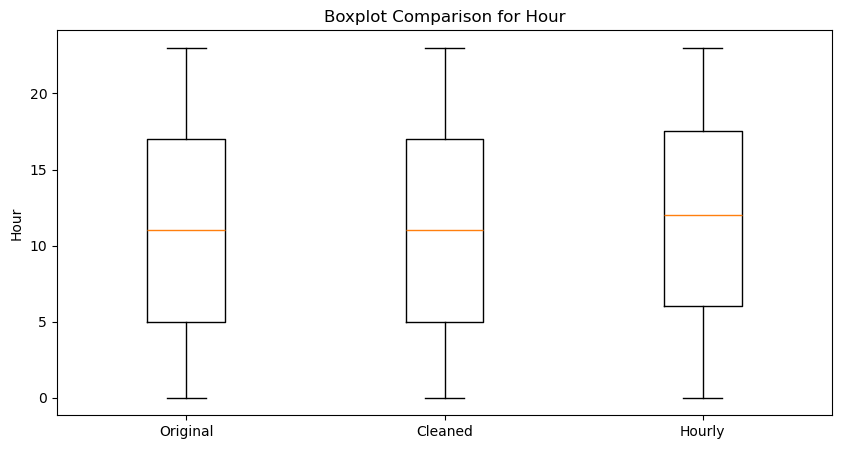

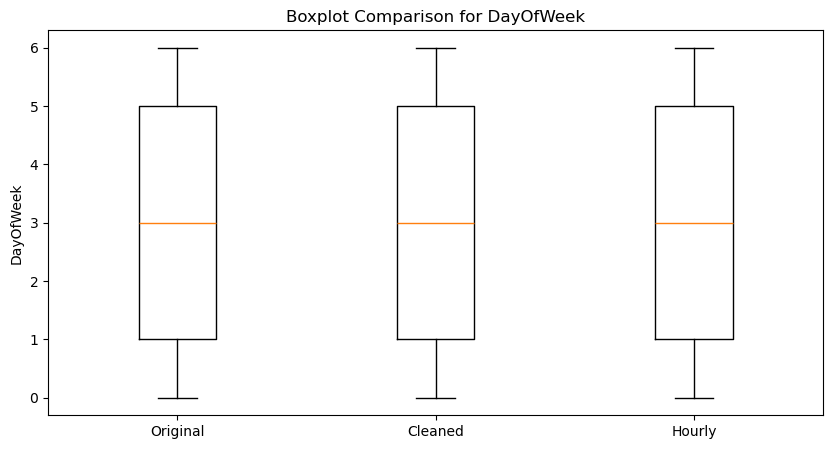

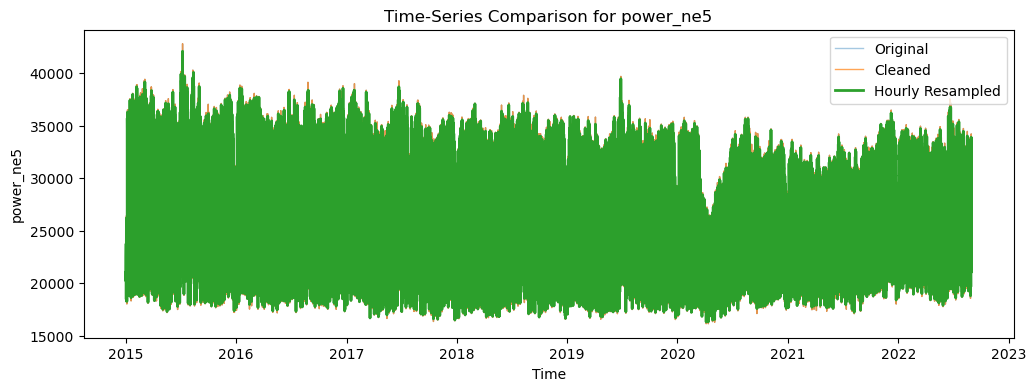

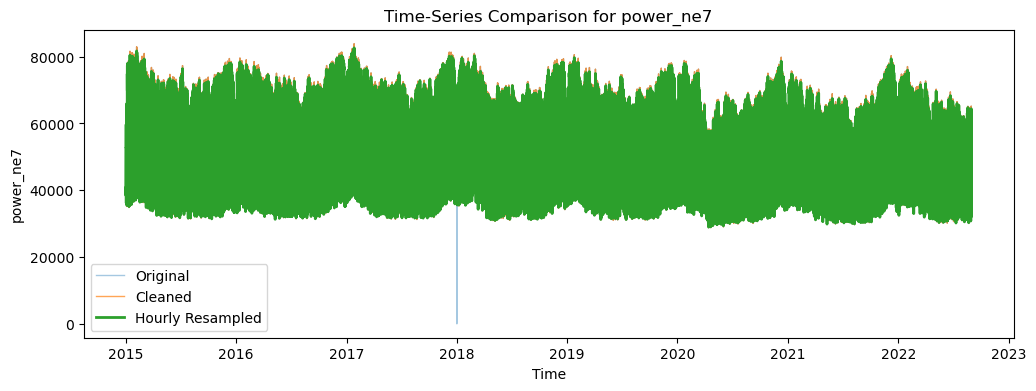

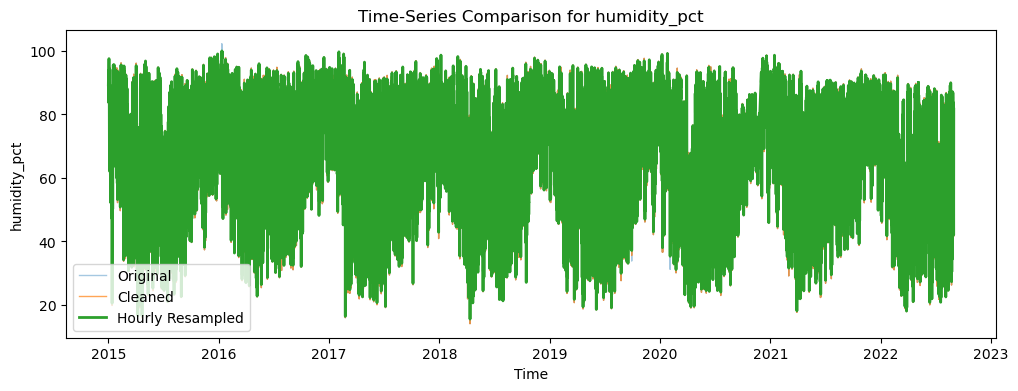

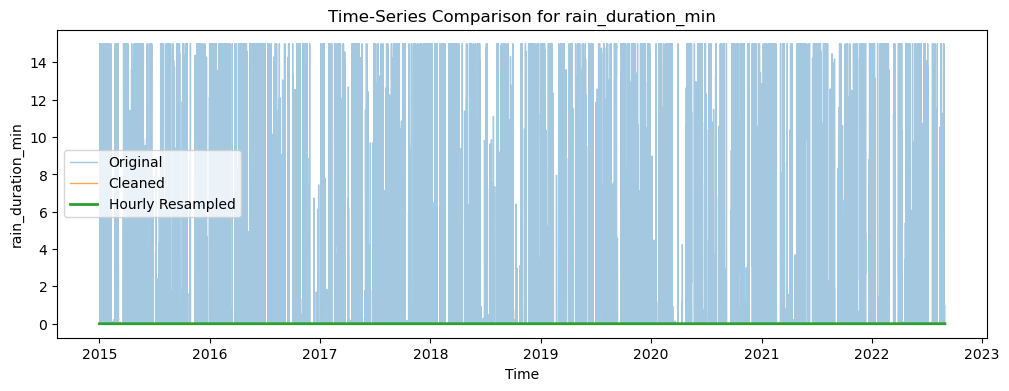

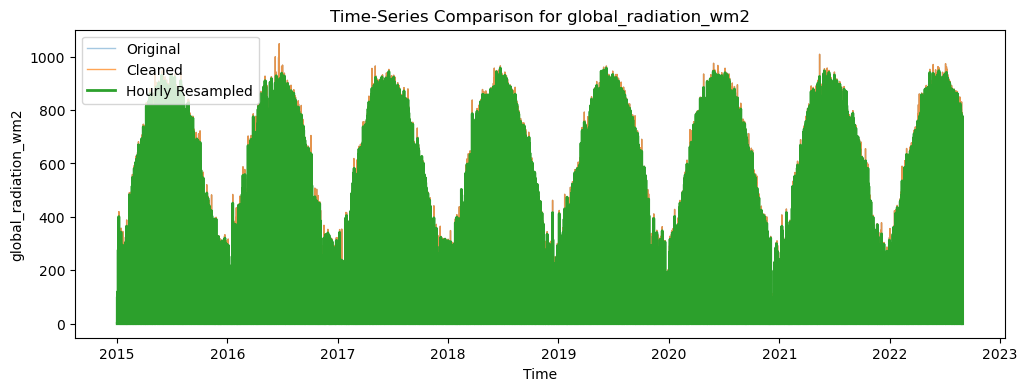

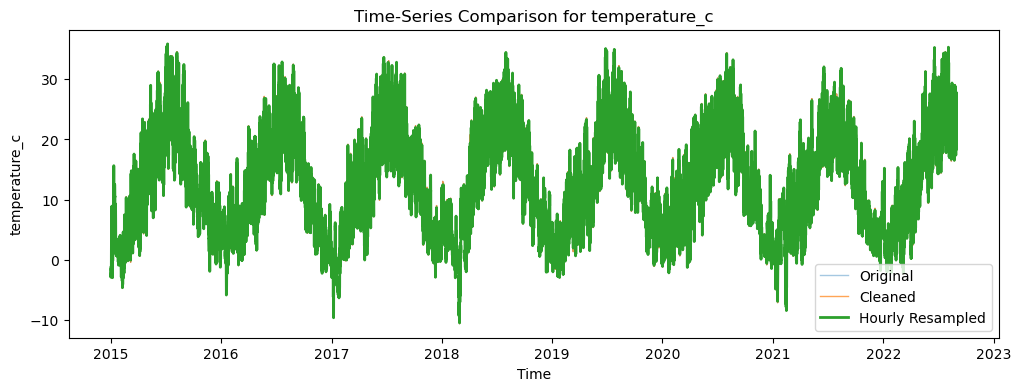

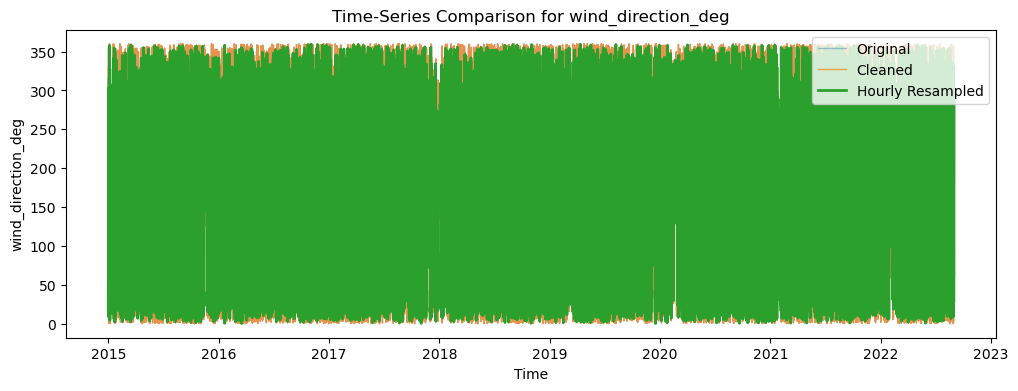

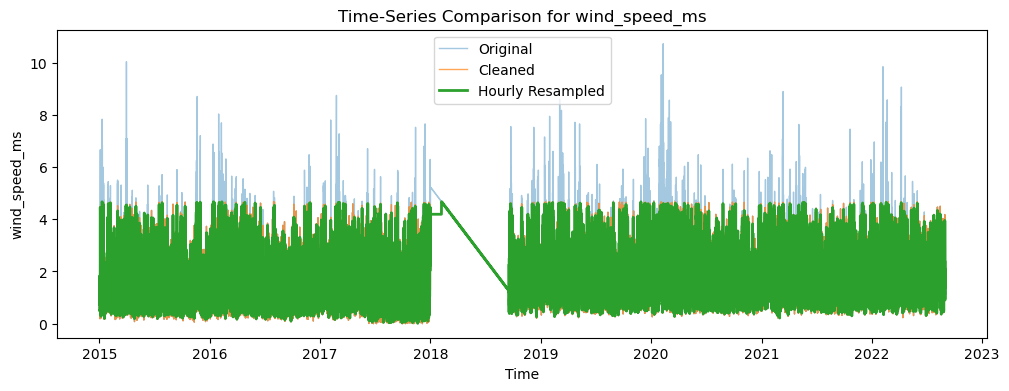

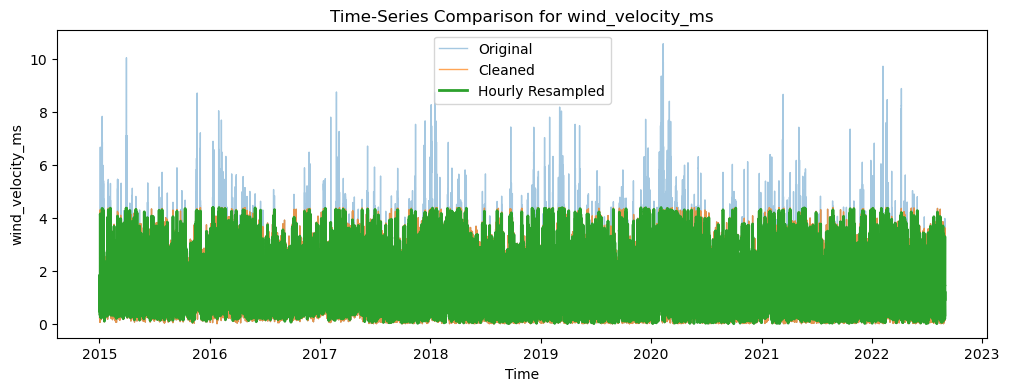

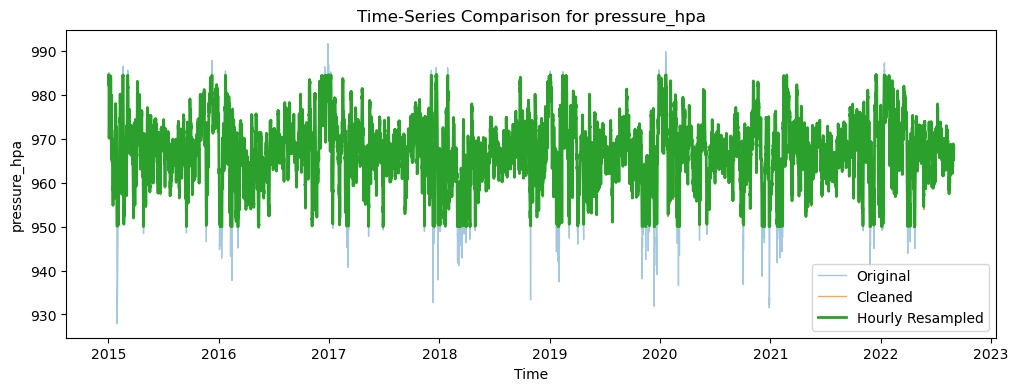

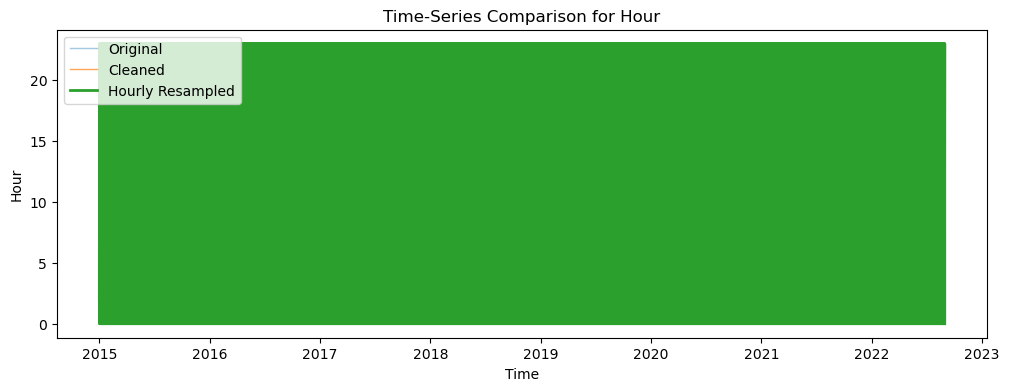

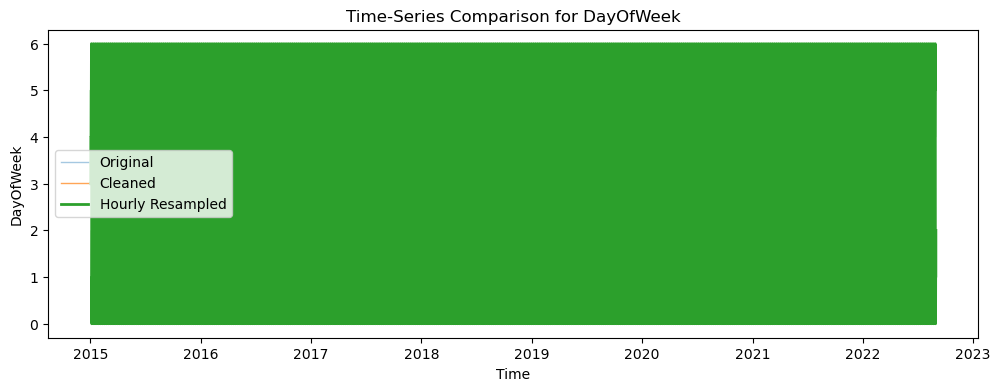

In [8]:
import matplotlib.pyplot as plt

# df_original, df_cleaned, df_hourly
# These are assumed to be outputs from preprocess_zurich_data()

# Ensure Timestamp index exists
df_original["Timestamp"] = pd.to_datetime(df_original["Timestamp"])
df_original = df_original.set_index("Timestamp")

# Numeric columns only
numeric_cols = df_original.select_dtypes(include="number").columns.tolist()

# ======================================================
# 1) BOXPLOT COMPARISON (Original vs Cleaned vs Hourly)
# ======================================================

for col in numeric_cols:
    
    plt.figure(figsize=(10,5))
    
    data_to_plot = [
        df_original[col].dropna(),
        df_cleaned[col].dropna(),
        df_hourly[col].dropna() if col in df_hourly.columns else []
    ]
    
    plt.boxplot(data_to_plot, tick_labels=["Original", "Cleaned", "Hourly"])
    
    plt.title(f"Boxplot Comparison for {col}")
    plt.ylabel(col)
    plt.show()

# ======================================================
# 2) TIME-SERIES COMPARISON (Sample Window)
# ======================================================
# Plot the first part of the series to keep the figure readable

sample_original = df_original
sample_cleaned = df_cleaned

# df_hourly already contains fewer points
sample_hourly = df_hourly

for col in numeric_cols:
    
    plt.figure(figsize=(12,4))
    
    plt.plot(sample_original.index, sample_original[col], alpha=0.4, linewidth=1, label="Original")
    plt.plot(sample_cleaned.index, sample_cleaned[col], alpha=0.7, linewidth=1, label="Cleaned")
    
    # Plot hourly series only if the column exists
    if col in sample_hourly.columns:
        plt.plot(sample_hourly.index, sample_hourly[col], linewidth=2, label="Hourly Resampled")
    
    plt.title(f"Time-Series Comparison for {col}")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.legend()
    plt.show()


## 2.2.1 Time-Series Visualizations (Raw, Smoothed, Rolling Mean)

In this section, I visualized the target metric over time in different forms.

- **Raw series:** the original values over time.
- **Smoothed series:** a short window smoothing to reduce noise and show the main trend.
- **Rolling mean:** a larger window rolling average to highlight longer-term patterns.
- These views help identify trends, peaks, and repeating patterns in consumption.


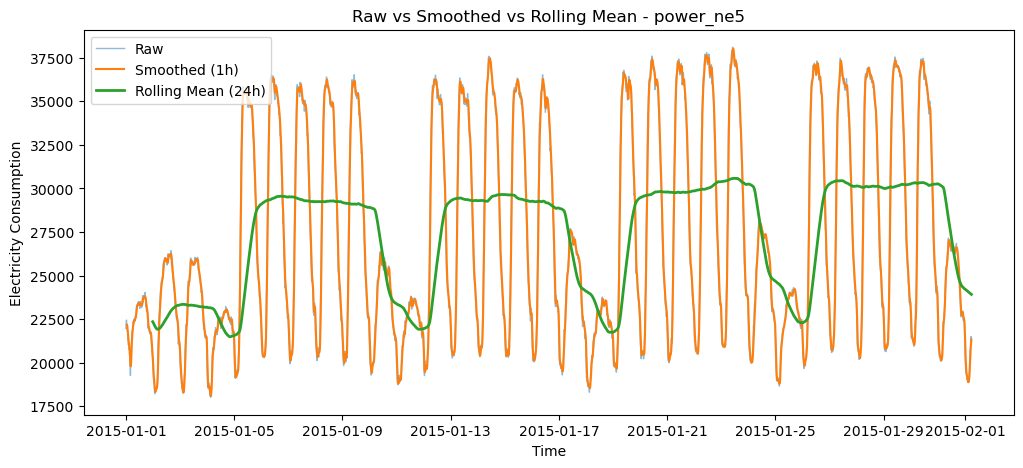

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# # Load dataset
# df = pd.read_csv("zurich_electricity_consumption.csv")
# df["Timestamp"] = pd.to_datetime(df["Timestamp"])
# df = df.set_index("Timestamp")

target = "power_ne5"

# Smoothed and rolling mean series
df_cleaned["smoothed_1h"] = df_cleaned[target].rolling(window=4).mean()      # 1-hour smoothing (4×15min)
df_cleaned["rolling_24h"] = df_cleaned[target].rolling(window=96).mean()     # 24-hour rolling mean

# Plot Raw vs Smoothed vs Rolling Mean
plt.figure(figsize=(12,5))
plt.plot(df_cleaned.index[:3000], df_cleaned[target][:3000], linewidth=1, alpha=0.5, label="Raw")
plt.plot(df_cleaned.index[:3000], df_cleaned["smoothed_1h"][:3000], linewidth=1.5, label="Smoothed (1h)")
plt.plot(df_cleaned.index[:3000], df_cleaned["rolling_24h"][:3000], linewidth=2, label="Rolling Mean (24h)")
plt.title("Raw vs Smoothed vs Rolling Mean - power_ne5")
plt.xlabel("Time")
plt.ylabel("Electricity Consumption")
plt.legend()
plt.show()


## 2.2.2 Distribution Analysis (Histogram and Density)

In this section, I analyzed the distribution of the target metric.

- I used a **histogram** to see the overall shape of the data and where most values fall.
- I added a **density (KDE) plot** to get a smoother view of the distribution.
- This helps identify skewness, peaks, and possible extreme values.


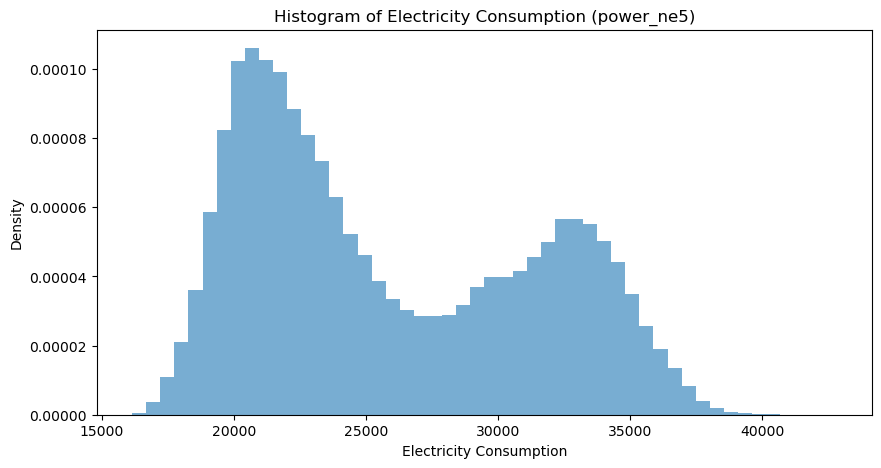

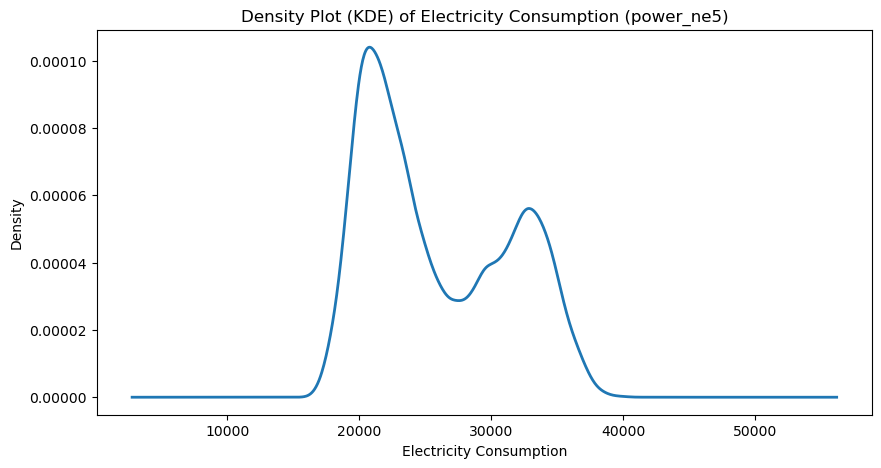

In [10]:
import matplotlib.pyplot as plt

target = "power_ne5"

# Histogram
plt.figure(figsize=(10,5))
plt.hist(df_cleaned[target].dropna(), bins=50, density=True, alpha=0.6)
plt.title("Histogram of Electricity Consumption (power_ne5)")
plt.xlabel("Electricity Consumption")
plt.ylabel("Density")
plt.show()

# Density (KDE)
plt.figure(figsize=(10,5))
df_cleaned[target].dropna().plot(kind="kde", linewidth=2)
plt.title("Density Plot (KDE) of Electricity Consumption (power_ne5)")
plt.xlabel("Electricity Consumption")
plt.ylabel("Density")
plt.show()


## 2.2.2 Distribution Analysis for All Numeric Metrics

In this section, I explored the distributions of all numeric variables in the cleaned dataset.

- I plotted a **histogram** for each numeric metric to see the distribution shape.
- When applicable, I also plotted a **density (KDE) curve** to provide a smoother view.
- If a metric is nearly constant or has too few unique values, the KDE plot is skipped because it would not be meaningful.


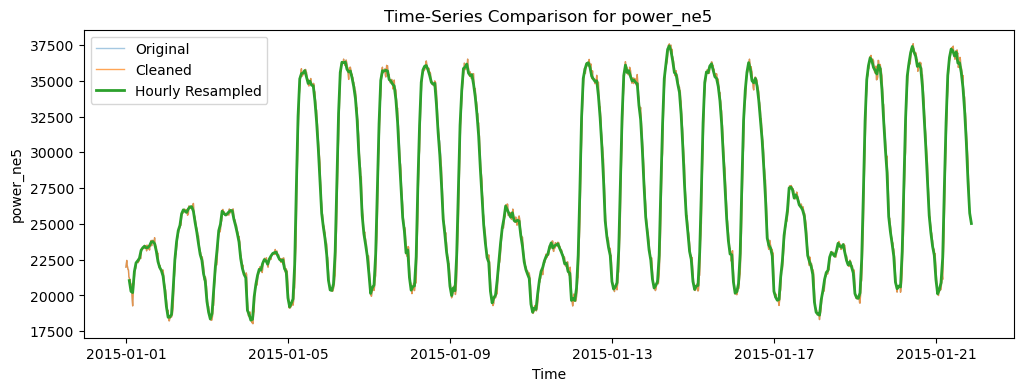

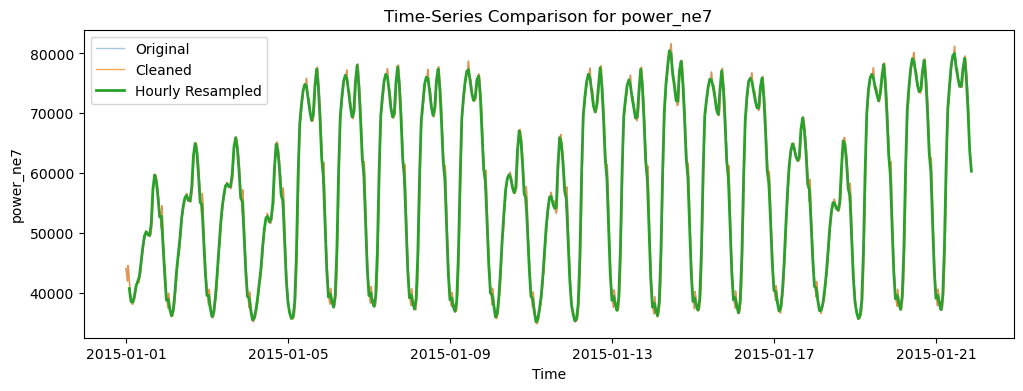

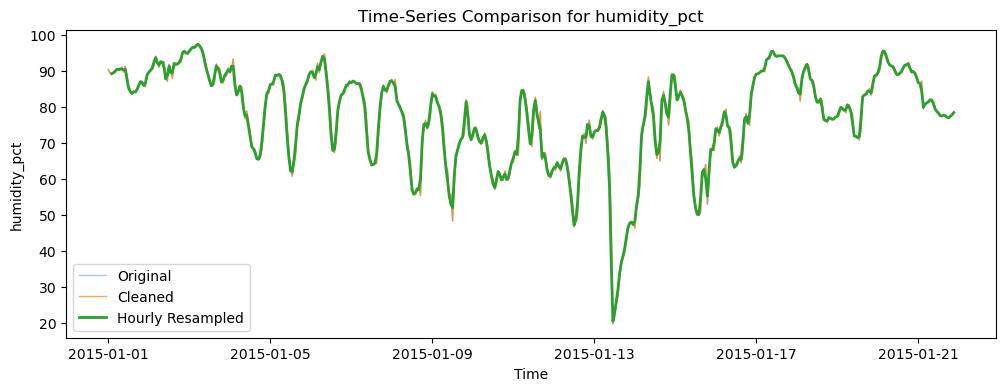

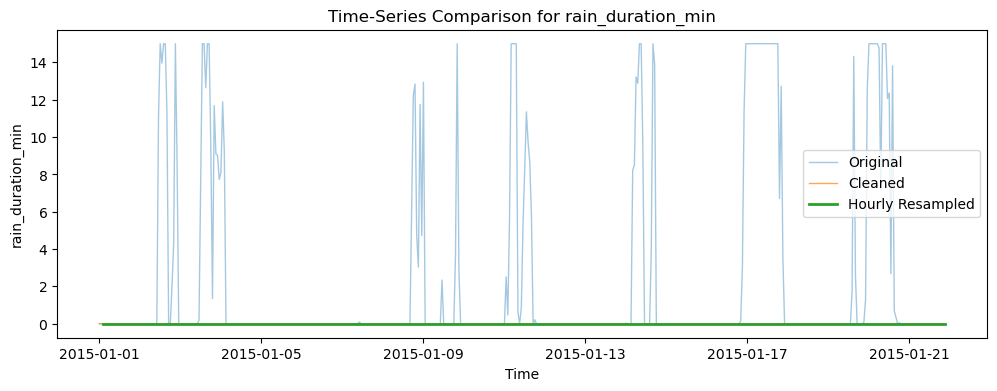

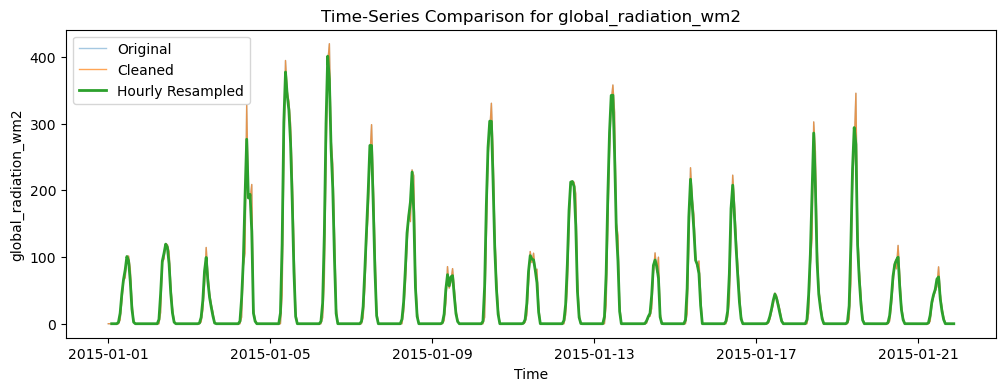

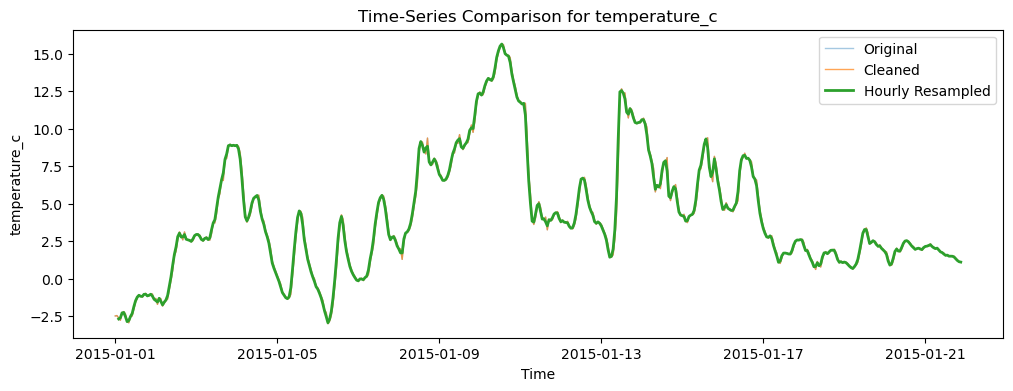

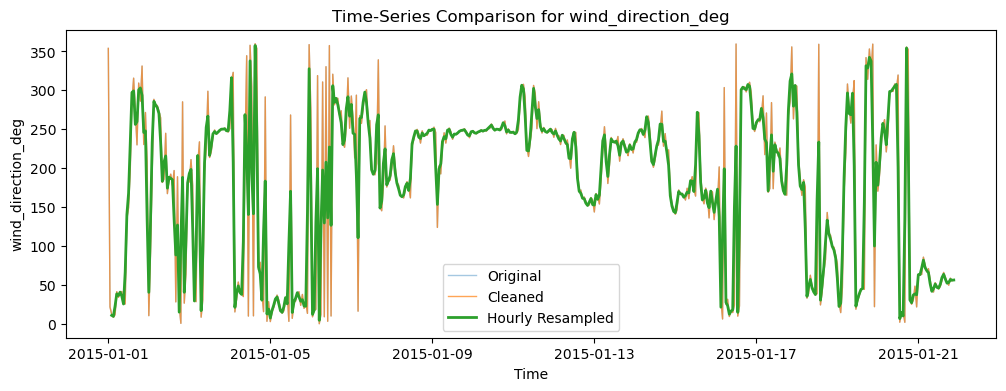

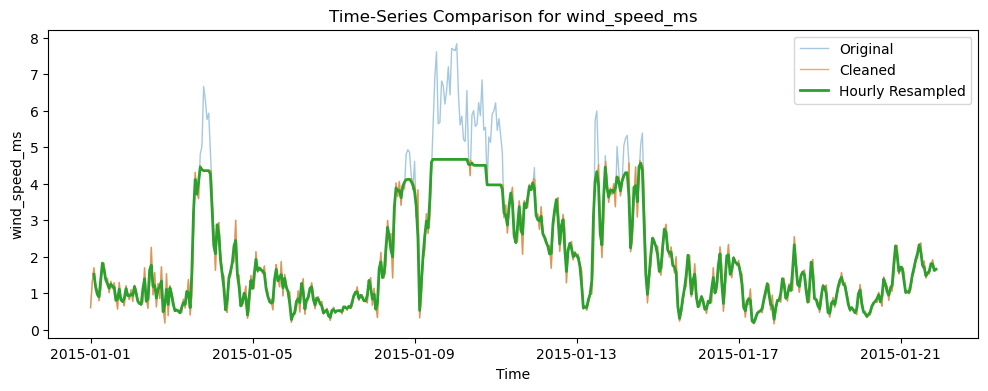

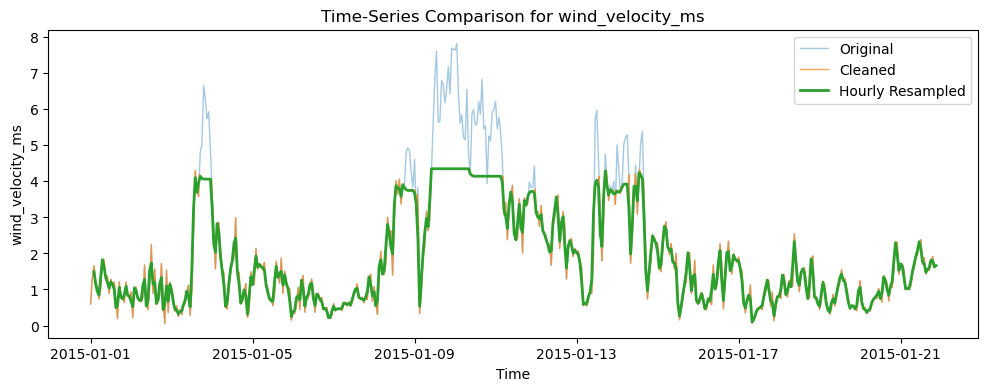

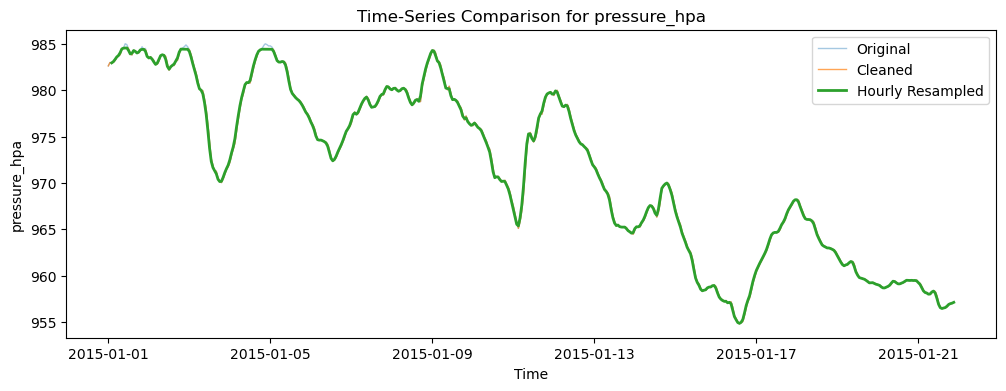

In [11]:
# ======================================================
# 2) TIME-SERIES COMPARISON (Sample Window)
# ======================================================
# Plot only a sample window to keep the figures readable

sample_original = df_original.iloc[:2000]
sample_cleaned = df_cleaned.iloc[:2000]
sample_hourly = df_hourly.iloc[:500]  # fewer points

for col in numeric_cols:
    if col ==  "Hour" or col == "DayOfWeek" or col.startswith("lag_") or col.startswith("rolling_"):
        continue  # Skip derived/time-feature columns

    # Skip if the column does not exist in the original dataframe
    if col not in sample_original.columns:
        continue

    plt.figure(figsize=(12, 4))

    plt.plot(sample_original.index, sample_original[col], alpha=0.4, linewidth=1, label="Original")
    plt.plot(sample_cleaned.index, sample_cleaned[col], alpha=0.7, linewidth=1, label="Cleaned")

    if col in sample_hourly.columns:
        plt.plot(sample_hourly.index, sample_hourly[col], linewidth=2, label="Hourly Resampled")

    plt.title(f"Time-Series Comparison for {col}")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.legend()
    plt.show()


## 2.2.3 Correlation Heatmaps for Numeric Metrics (Pearson & Spearman)

In this section, I computed correlations between all numeric variables in the cleaned dataset.
I used **Pearson** (linear correlation) and **Spearman** (rank-based correlation) and visualized both as heatmaps with the correlation values shown inside each cell.


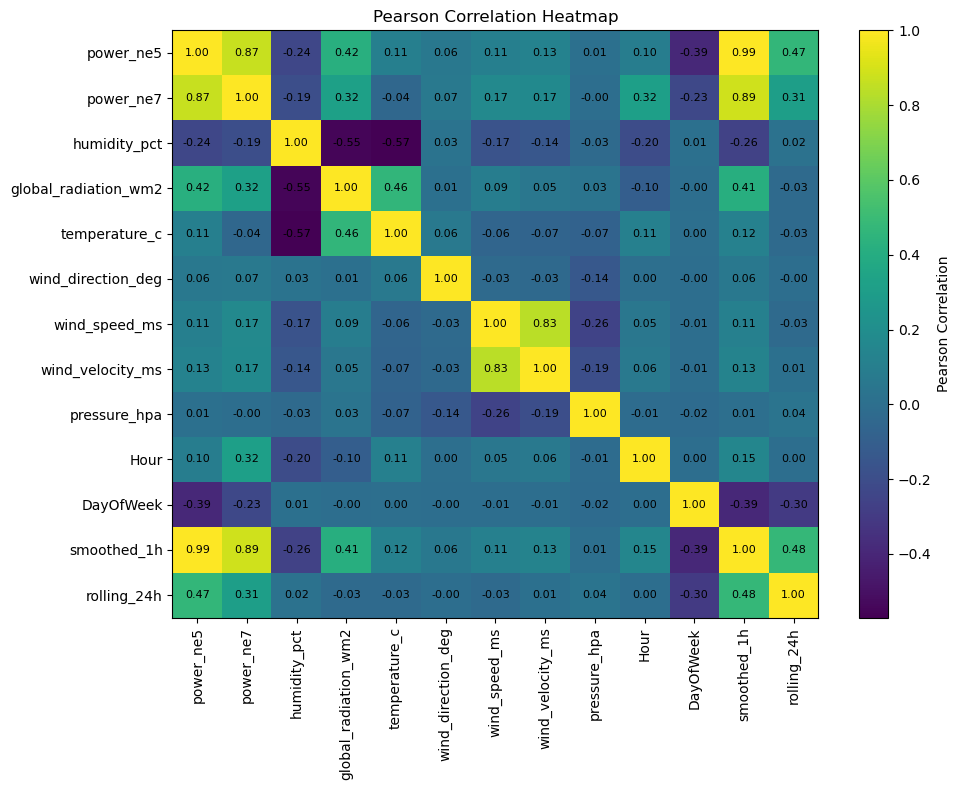

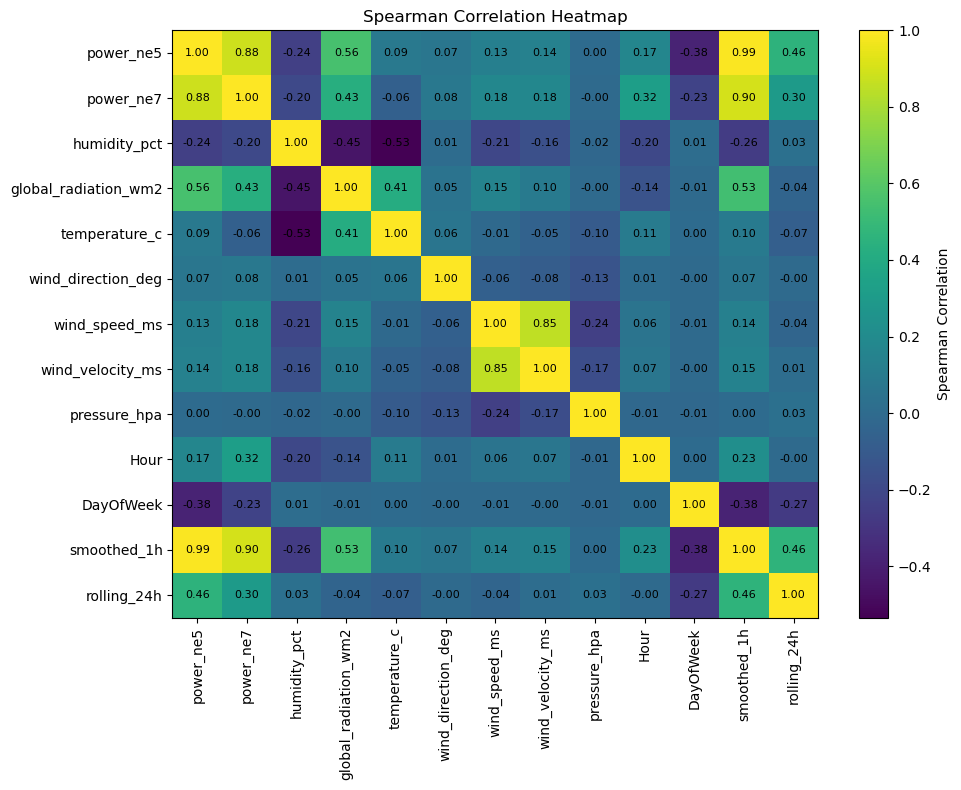

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns only
numeric_df = df_cleaned.select_dtypes(include="number")

# Remove columns with zero variance (not informative for correlation)
numeric_df = numeric_df.loc[:, numeric_df.var() > 0]

# =========================
# Pearson Correlation (with numbers)
# =========================
pearson_corr = numeric_df.corr(method="pearson")

plt.figure(figsize=(10, 8))
plt.imshow(pearson_corr, aspect="auto")
plt.colorbar(label="Pearson Correlation")
plt.xticks(range(len(pearson_corr.columns)), pearson_corr.columns, rotation=90)
plt.yticks(range(len(pearson_corr.columns)), pearson_corr.columns)
plt.title("Pearson Correlation Heatmap")

# Add correlation values inside each cell
for i in range(pearson_corr.shape[0]):
    for j in range(pearson_corr.shape[1]):
        plt.text(j, i, f"{pearson_corr.iloc[i, j]:.2f}",
                 ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.show()

# =========================
# Spearman Correlation (with numbers)
# =========================
spearman_corr = numeric_df.corr(method="spearman")

plt.figure(figsize=(10, 8))
plt.imshow(spearman_corr, aspect="auto")
plt.colorbar(label="Spearman Correlation")
plt.xticks(range(len(spearman_corr.columns)), spearman_corr.columns, rotation=90)
plt.yticks(range(len(spearman_corr.columns)), spearman_corr.columns)
plt.title("Spearman Correlation Heatmap")

# Add correlation values inside each cell
for i in range(spearman_corr.shape[0]):
    for j in range(spearman_corr.shape[1]):
        plt.text(j, i, f"{spearman_corr.iloc[i, j]:.2f}",
                 ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.show()


## 2.2.4 Time-Based Patterns (Hour, Day of Week, Month)

In this section, I extracted time features from the timestamp and analyzed how the average power consumption changes across:
- **hours of the day**
- **days of the week**
- **months of the year**

These plots help highlight daily, weekly, and seasonal patterns in electricity usage.


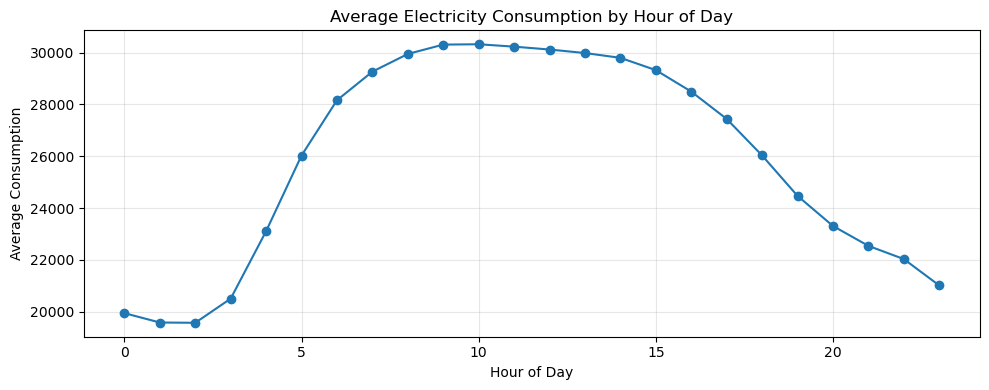

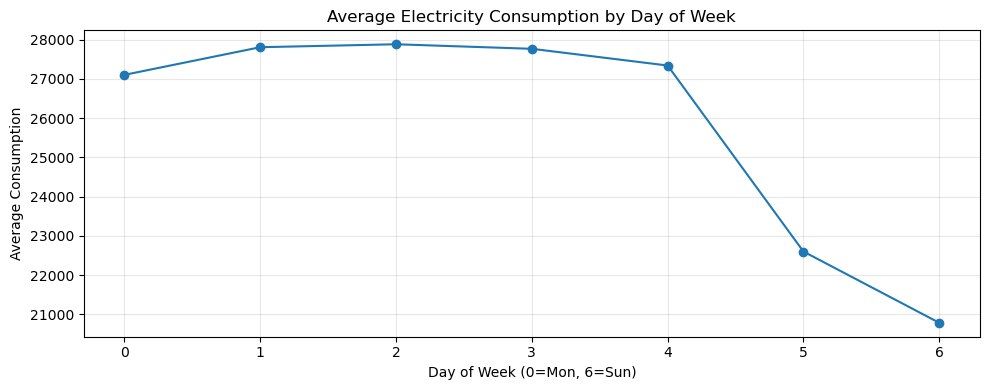

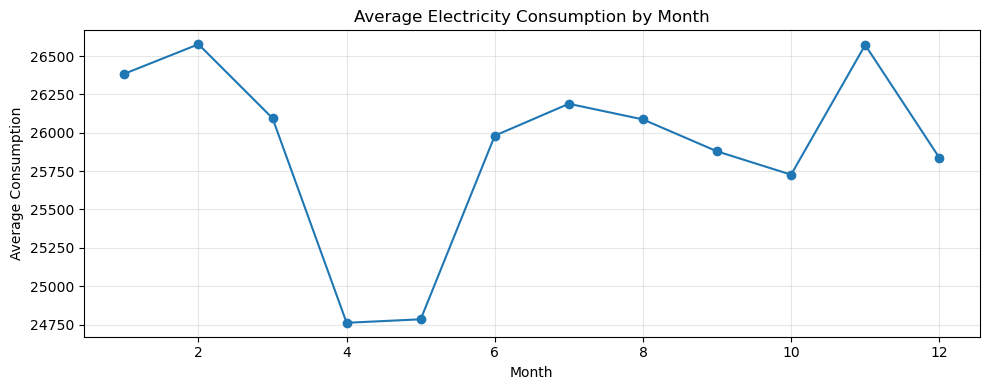

In [13]:
import matplotlib.pyplot as plt

target = "power_ne5"

# =========================
# Extract time-based features
# =========================
df_time = df_cleaned.copy()
df_time["hour"] = df_time.index.hour
df_time["day_of_week"] = df_time.index.dayofweek  # 0 = Monday
df_time["month"] = df_time.index.month

# =========================
# Hour-of-Day Pattern
# =========================
hourly_mean = df_time.groupby("hour")[target].mean()

plt.figure(figsize=(10, 4))
plt.plot(hourly_mean.index, hourly_mean.values, marker="o")
plt.title("Average Electricity Consumption by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Consumption")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================
# Day-of-Week Pattern
# =========================
daily_mean = df_time.groupby("day_of_week")[target].mean()

plt.figure(figsize=(10, 4))
plt.plot(daily_mean.index, daily_mean.values, marker="o")
plt.title("Average Electricity Consumption by Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Average Consumption")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================
# Monthly / Seasonal Pattern
# =========================
monthly_mean = df_time.groupby("month")[target].mean()

plt.figure(figsize=(10, 4))
plt.plot(monthly_mean.index, monthly_mean.values, marker="o")
plt.title("Average Electricity Consumption by Month")
plt.xlabel("Month")
plt.ylabel("Average Consumption")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 2.2.5 Summery
Based on the time-series visualizations, distribution analysis, correlation heatmaps, and periodic pattern plots, the following check statements summarize the observed behavior of electricity consumption.
1. Daily and Periodic Patterns:\
a_) Electricity consumption shows a clear day/night cycle\
b_) Electricity consumption peaks during working hours
2. Weekly Behavior\
c_) Electricity consumption is higher on weekdays than on weekends\
d_) Electricity consumption remains constant across all days of the week
3. Seasonal and Monthly Patterns\
e_) Electricity consumption exhibits seasonal variation across months\
f_) Electricity consumption is uniformly distributed throughout the year
4. Distribution and Variability\
g_) Electricity consumption values follow a perfectly normal (Gaussian) distribution\
h_) Electricity consumption shows high variability during peak usage periods

In [14]:
# Your answers and reasoning below. For each statement, first set the boolean value 
# then explain your reasoning based on the visualizations.

# Daily and Periodic Patterns
a_ = True
# Day-of-week analysis shows higher average consumption from Monday to Friday compared to Saturday and Sunday.
# This suggests increased industrial and commercial electricity usage during working days.

b_ = True
# The hourly average plot shows peak consumption during morning and midday hours, coinciding with typical working and business activity periods.
# Consumption gradually decreases after evening hours, confirming work-related demand influence.

# Weekly Behavior
c_ = True
# Day-of-week analysis shows higher average consumption from Monday to Friday compared to Saturday and Sunday.
# This suggests increased industrial and commercial electricity usage during working days.

d_ = False
# Clear differences are observed between weekdays and weekends, with noticeable drops during weekend days.
# This variation contradicts the assumption of constant daily consumption.

# Seasonal and Monthly Patterns
e_ = True
# Monthly aggregation reveals noticeable differences between months, with higher consumption during winter months and lower values during transitional seasons (spring and autumn).
# This indicates seasonal effects such as heating demand.

f_ = False
# The monthly averages show clear peaks and troughs rather than a flat distribution, confirming the presence of seasonality in electricity usage.

# Distribution and Variability
g_ = False
# Histogram and density plots show right-skewed distributions with long tails, indicating occasional high-demand periods rather than symmetric normal behavior.
# This is typical for real-world electricity consumption data.

h_ = True 
# During peak daytime and winter periods, the spread of consumption values increases, indicating higher variability compared to nighttime or low-demand periods.
# This reflects fluctuating demand during active usage times.


## 2.3.1 Threshold-Based Event Probability

In this section, I defined a high-consumption event using a percentile threshold.
I computed the empirical probability of this event as the fraction of timestamps where the target exceeds the threshold.


In [15]:
import pandas as pd

target = "power_ne5"

# Define threshold (90th percentile) and justify: top 10% values represent "high consumption" events
threshold = df_cleaned[target].quantile(0.9)

# Define the event
df_events = df_cleaned.copy()
df_events["high_consumption_event"] = df_events[target] > threshold

# Empirical probability of the event
event_probability = df_events["high_consumption_event"].mean()

threshold, event_probability


(np.float64(33917.894), np.float64(0.10000186077668818))

Visualize threshold on the time-series

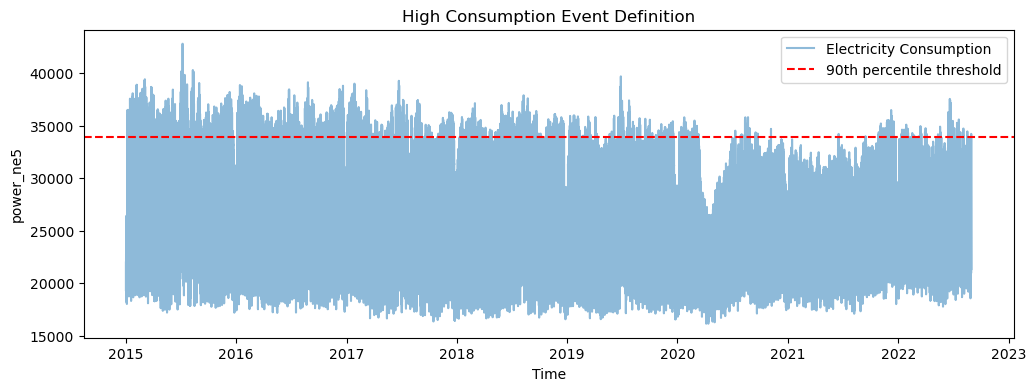

In [16]:
plt.figure(figsize=(12,4))
plt.plot(df_cleaned.index, df_cleaned['power_ne5'],
         alpha=0.5, label='Electricity Consumption')
plt.axhline(threshold, color='red', linestyle='--',
            label='90th percentile threshold')
plt.legend()
plt.title("High Consumption Event Definition")
plt.xlabel("Time")
plt.ylabel("power_ne5")
plt.show()


## 2.3.2 Cross Tabulation (Two Variables)

In this section, I used cross tabulation to compare two categorical variables.
The table shows how the event frequency changes across groups (e.g., Day vs Night).


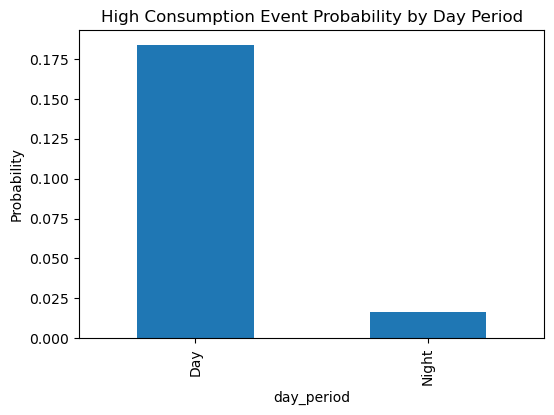

P(High Consumption | Day) = 0.1838603072525902
P(High Consumption | Night) = 0.016144038465832546


In [17]:

# Create day/night indicator
df_events["hour"] = df_events.index.hour
df_events["day_period"] = df_events["hour"].apply(lambda x: "Day" if 8 <= x < 20 else "Night")

# Conditional probabilities (normalized per group)
crosstab_period = pd.crosstab(
    df_events["day_period"],
    df_events["high_consumption_event"],
    normalize="index"
)

crosstab_period

crosstab_period[True].plot(
    kind='bar',
    figsize=(6,4),
    title="High Consumption Event Probability by Day Period"
)
plt.ylabel("Probability")
plt.show()


# Print conditional probabilities
p_event_given_day = crosstab_period.loc["Day", True]
p_event_given_night = crosstab_period.loc["Night", True]

print("P(High Consumption | Day) =", p_event_given_day)
print("P(High Consumption | Night) =", p_event_given_night)


## 2.3.3 Conditional Probability Analysis

In this section, I estimated conditional probabilities to understand how event likelihood changes across different conditions.
I computed and compared probabilities such as P(event | Day) vs P(event | Night), and P(event | Weekday) vs P(event | Weekend).


In [18]:

# Weekday/weekend indicator
df_events["dayofweek"] = df_events.index.dayofweek
df_events["day_type"] = df_events["dayofweek"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

crosstab_daytype = pd.crosstab(
    df_events["day_type"],
    df_events["high_consumption_event"],
    normalize="index"
)

crosstab_daytype


p_event_given_weekday = crosstab_daytype.loc["Weekday", True]
p_event_given_weekend = crosstab_daytype.loc["Weekend", True]

print("P(High Consumption ∣ weekday)=",p_event_given_weekday)
print("P(High Consumption ∣ weekend)=", p_event_given_weekend)

P(High Consumption ∣ weekday)= 0.14002240692009066
P(High Consumption ∣ weekend)= 0.0


🔹 Summary of Observations

The analysis shows that high electricity consumption events are strongly dependent on temporal factors.
Such events occur significantly more frequently during daytime hours compared to nighttime, and are more common on weekdays than weekends.
This indicates that peak electricity demand is driven by human and industrial activity patterns rather than random fluctuations.

🔹 Assumptions

Several assumptions were made during this analysis.
First, the 90th percentile threshold was assumed to be an appropriate definition of a high consumption event.
Second, the empirical probabilities were computed under the assumption that the cleaned dataset accurately represents normal operating conditions without systematic measurement errors.
Finally, temporal independence between observations was implicitly assumed when estimating event probabilities.

🔹 Limitations and Potential Biases

The estimated probabilities may be biased by the choice of threshold, as different percentile values would lead to different event frequencies.
Additionally, seasonal effects were not explicitly controlled for, which could influence consumption patterns across different months.
The analysis is also limited to historical data from a single location, reducing the generalizability of the results to other regions or time periods.

## 2.4.1 Law of Large Numbers (LLN)

In this section, I demonstrated the Law of Large Numbers using the event indicator (0/1).
I computed the cumulative average of the event over time and showed that it converges toward the overall event probability as the number of observations increases.


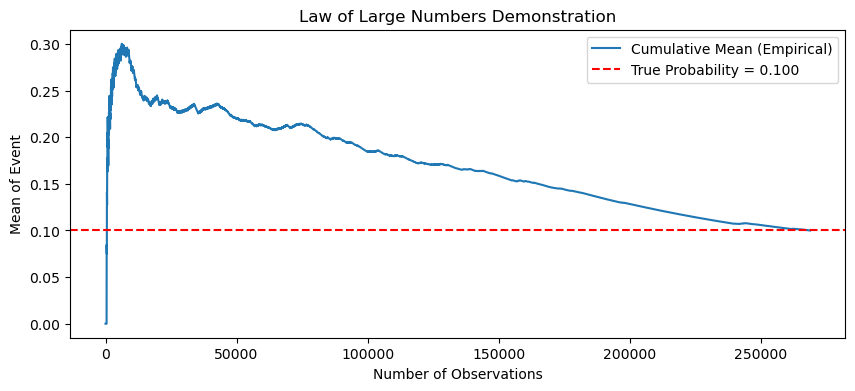

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the event to numeric values (0/1)
event_series = df_events["high_consumption_event"].astype(int)

# Cumulative mean (running average)
cumulative_mean = event_series.expanding().mean()

# Reference value (overall empirical probability)
true_probability = event_series.mean()

# Plot
plt.figure(figsize=(10, 4))
plt.plot(cumulative_mean.values, label="Cumulative Mean (Empirical)")
plt.axhline(true_probability, color="red", linestyle="--",
            label=f"True Probability = {true_probability:.3f}")
plt.xlabel("Number of Observations")
plt.ylabel("Mean of Event")
plt.title("Law of Large Numbers Demonstration")
plt.legend()
plt.show()


## 2.4.2 Central Limit Theorem (CLT)

In this section, I applied the Central Limit Theorem using repeated random sampling.
I generated sampling distributions of the sample mean for different sample sizes and compared how the distribution becomes more normal and less variable as the sample size increases.


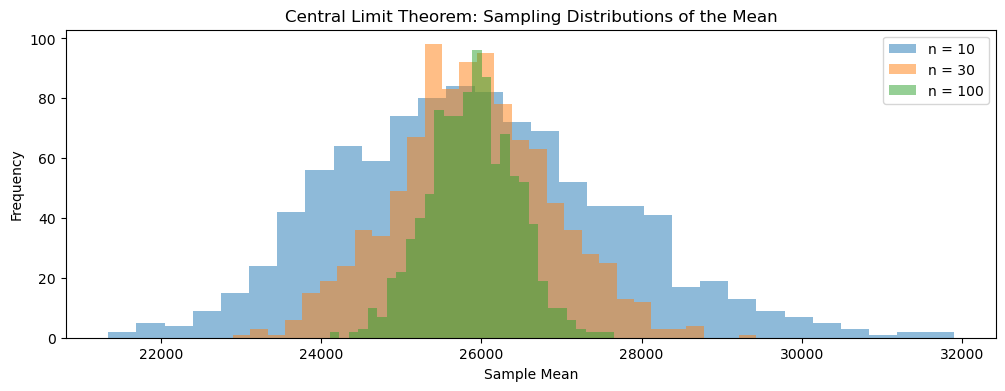

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Original series (use the renamed target column)
data = df_cleaned["power_ne5"].dropna().values

# Different sample sizes
sample_sizes = [10, 30, 100]

n_samples = 1000  # number of repeated samples

plt.figure(figsize=(12, 4))

for n in sample_sizes:
    sample_means = [
        np.mean(np.random.choice(data, size=n, replace=True))
        for _ in range(n_samples)
    ]

    plt.hist(sample_means, bins=30, alpha=0.5, label=f"n = {n}")

plt.title("Central Limit Theorem: Sampling Distributions of the Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## 2.4.3 Interpretation and Sanity Checks

In this section, I summarized the results and verified they make sense.
I checked that the conclusions are consistent with the plots and statistics, and noted what factors could invalidate the results (e.g., strong non-stationarity, heavy preprocessing effects, or biased sampling).


🔹 Result Interpretation

The observed convergence of the cumulative mean toward the overall event probability supports the Law of Large Numbers.
Similarly, the sampling distributions of the sample mean become increasingly normal as the sample size increases, which is consistent with the Central Limit Theorem.
These results confirm that empirical averages and sampling behavior in the dataset follow established statistical principles.

🔹 Sanity Checks Performed

Several sanity checks were conducted to validate the results.
First, the overall empirical probability was computed independently and used as a reference in the LLN visualization.
Second, multiple sample sizes were tested in the CLT analysis to verify that increasing sample size leads to reduced variance and more normal-shaped distributions.
Finally, the original data was inspected to confirm that it is not normally distributed, ensuring that the CLT result is non-trivial.

🔹 What Would Invalidate These Conclusions

The conclusions would be invalidated if the sample size were too small to observe convergence effects, or if the observations were heavily dependent in a way that violates the assumptions of the theorems.
Additionally, systematic measurement errors or strong unaccounted seasonality could bias the empirical estimates and distort the observed convergence behavior.

## 2.5.1 Prediction Target and Features

In this section, I defined the prediction target as the next-step electricity consumption (t+1).
I built a feature set using time-based variables (hour/day/month), lagged consumption values, rolling statistics, and weather-related variables to capture daily/weekly patterns and short-term dependencies.


In [21]:
import pandas as pd

# =========================
# Assume df_cleaned exists
# =========================
df = df_cleaned.copy()

# =========================
# Target variable (next time step)
# =========================
df["target"] = df["power_ne5"].shift(-1)

# =========================
# Time-based features
# =========================
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month
df["is_weekend"] = (df.index.dayofweek >= 5).astype(int)

# =========================
# Lag features (15-min resolution)
# =========================
df["lag_1"]  = df["power_ne5"].shift(1)     # 15 min ago
df["lag_4"]  = df["power_ne5"].shift(4)     # 1 hour ago
df["lag_96"] = df["power_ne5"].shift(96)    # same time yesterday

# =========================
# Rolling statistics
# =========================
df["rolling_mean_4"]  = df["power_ne5"].rolling(4).mean()
df["rolling_mean_96"] = df["power_ne5"].rolling(96).mean()
df["rolling_std_96"]  = df["power_ne5"].rolling(96).std()

# =========================
# Select final modeling dataframe
# =========================
features = [
    "hour", "dayofweek", "month", "is_weekend",
    "lag_1", "lag_4", "lag_96",
    "rolling_mean_4", "rolling_mean_96", "rolling_std_96",
    "temperature_c", "humidity_pct", "rain_duration_min",
    "global_radiation_wm2", "wind_speed_ms", "pressure_hpa"
]

df_model = df[features + ["target"]].dropna()

df_model.head()


hour  dayofweek  month  is_weekend      lag_1      lag_4  \
Timestamp                                                                       
2015-01-02 00:00:00     0          4      1           0  20022.681  20664.971   
2015-01-02 00:15:00     0          4      1           0  19590.372  20528.069   
2015-01-02 00:30:00     0          4      1           0  19360.055  20366.797   
2015-01-02 00:45:00     0          4      1           0  19009.026  20022.681   
2015-01-02 01:00:00     1          4      1           0  18868.864  19590.372   

                        lag_96  rolling_mean_4  rolling_mean_96  \
Timestamp                                                         
2015-01-02 00:00:00  21975.938     20126.97975     22329.881781   
2015-01-02 00:15:00  22197.983     19834.97625     22300.320031   
2015-01-02 00:30:00  22449.448     19495.53350     22264.482302   
2015-01-02 00:45:00  22124.219     19207.07925     22230.572354   
2015-01-02 01:00:00  21963.707     19050.09125     22199.308948   

                     rolling_std_96  temperature_c  humidity_pct  \
Timestamp                                                          
2015-01-02 00:00:00     1165.235632          -1.31         89.49   
2015-01-02 00:15:00     1203.972011          -1.41         89.66   
2015-01-02 00:30:00     1249.817661          -1.51         89.82   
2015-01-02 00:45:00     1296.937114          -1.61         89.99   
2015-01-02 01:00:00     1338.931745          -1.71         90.16   

                     rain_duration_min  global_radiation_wm2  wind_speed_ms  \
Timestamp                                                                     
2015-01-02 00:00:00                0.0                  0.01           1.10   
2015-01-02 00:15:00                0.0                  0.01           1.02   
2015-01-02 00:30:00                0.0                  0.02           0.94   
2015-01-02 00:45:00                0.0                  0.02           0.86   
2015-01-02 01:00:00                0.0                  0.02           0.78   

                     pressure_hpa     target  
Timestamp                                     
2015-01-02 00:00:00        983.43  19360.055  
2015-01-02 00:15:00        983.48  19009.026  
2015-01-02 00:30:00        983.52  18868.864  
2015-01-02 00:45:00        983.57  18962.420  
2015-01-02 01:00:00        983.62  18471.958

Prediction Target:\
The prediction target is the electricity consumption in the Zurich NE5 region at the next time step (t+1). This target reflects a realistic short-term electricity demand forecasting task, which is essential for energy planning and grid management. Electricity consumption is a continuous variable and exhibits strong temporal dependencies, making it suitable for regression-based time-series modeling.

Feature Definition + Justification:

Time-related features such as hour of day, day of week, month, and weekend indicator are included to capture daily, weekly, and seasonal consumption patterns commonly observed in electricity demand data.

Lagged consumption values (e.g., consumption at previous time steps, one hour ago, and the same time on the previous day) are used to model temporal autocorrelation, which is a fundamental characteristic of time-series data.

Rolling mean and standard deviation features are included to represent short-term trends and variability in electricity consumption, helping linear models capture medium-term dynamics.

Weather variables such as temperature, humidity, wind speed, solar radiation, and atmospheric pressure are included as exogenous predictors, as they have a direct and well-documented influence on electricity demand.

Closing Justification:

The selected features are interpretable, causally plausible, and available at prediction time, ensuring that no future information leakage occurs. Together, they provide a balanced representation of temporal patterns, historical dependence, and external drivers of electricity consumption.

## 2.5.2 Model Fitting, Validation, and Model Selection

In this section, I prepared a time-series train/test split (time-based, no shuffling) to avoid data leakage.
I trained two candidate regression models (Linear Regression and Polynomial Regression) and evaluated them on the test set using RMSE/MAE.
Finally, I compared both candidates and selected the better model based on performance and interpretability.


In [22]:
from sklearn.model_selection import train_test_split

# Features & target
X = df_model.drop(columns="target")
y = df_model["target"]

# Time-based split (80% train, 20% test)
split_index = int(len(df_model) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

# Check the time ranges to confirm no leakage
print("Train period:", X_train.index.min(), "→", X_train.index.max())
print("Test period :", X_test.index.min(),  "→", X_test.index.max())

Train period: 2015-01-02 00:00:00 → 2021-02-17 09:15:00
Test period : 2021-02-17 09:30:00 → 2022-08-30 23:45:00


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Linear model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_model.predict(X_test)

# Metrics
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mae_lin  = mean_absolute_error(y_test, y_pred_lin)

rmse_lin, mae_lin


(np.float64(429.5799450780894), 324.50578143864743)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin", LinearRegression())
])

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly  = mean_absolute_error(y_test, y_pred_poly)

rmse_poly, mae_poly


(np.float64(373.4498044783257), 285.16348922263296)

In [25]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression (deg=2)"],
    "RMSE": [rmse_lin, rmse_poly],
    "MAE": [mae_lin, mae_poly]
})

results


Model        RMSE         MAE
0              Linear Regression  429.579945  324.505781
1  Polynomial Regression (deg=2)  373.449804  285.163489

The Polynomial Regression model (degree 2) outperformed the Linear Regression baseline, achieving lower RMSE and MAE on the test set. This improvement indicates the presence of mild non-linear relationships between electricity consumption, temporal features, and weather variables. The magnitude of improvement is moderate, suggesting that while non-linearity exists, the underlying process is not overly complex. The results are realistic for short-term electricity demand forecasting and do not indicate overfitting.

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Predictions
y_pred_lin  = lin_model.predict(X_test)
y_pred_poly = poly_model.predict(X_test)

# Evaluation
rmse_lin, mae_lin = evaluate_model(y_test, y_pred_lin)
rmse_poly, mae_poly = evaluate_model(y_test, y_pred_poly)

rmse_lin, mae_lin, rmse_poly, mae_poly


(np.float64(429.5799450780894),
 324.50578143864743,
 np.float64(373.4498044783257),
 285.16348922263296)

## 2.5.3 Residual Analysis and Interpretation

In this section, I analyzed the model errors using residuals (actual − predicted).

- I inspected residuals over time to check for drift or time-dependent patterns.
- I checked the residual distribution to see if errors are centered around zero (bias) and to detect outliers.
- I identified failure cases (largest errors) to understand when the model performs poorly.
- Finally, I summarized what could be improved next (e.g., better features, different models, or handling peaks/extremes).


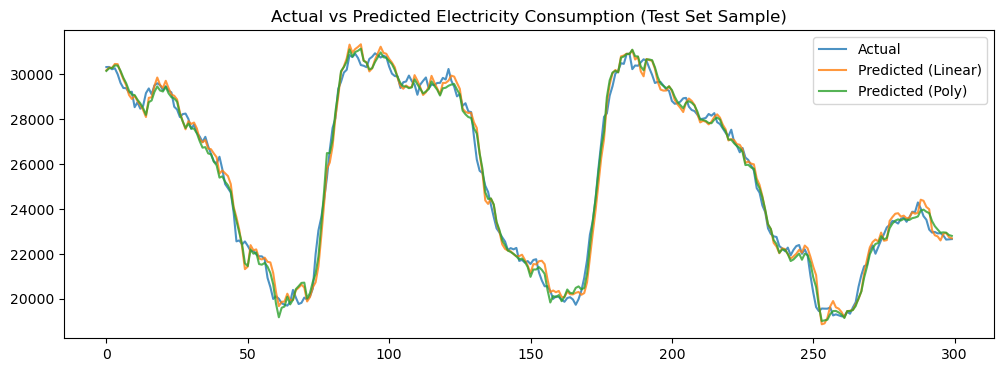

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(y_test.values[:300], label="Actual", alpha=0.8)
plt.plot(y_pred_lin[:300], label="Predicted (Linear)", alpha=0.8)
plt.plot(y_pred_poly[:300], label="Predicted (Poly)", alpha=0.8)
plt.title("Actual vs Predicted Electricity Consumption (Test Set Sample)")
plt.legend()
plt.show()


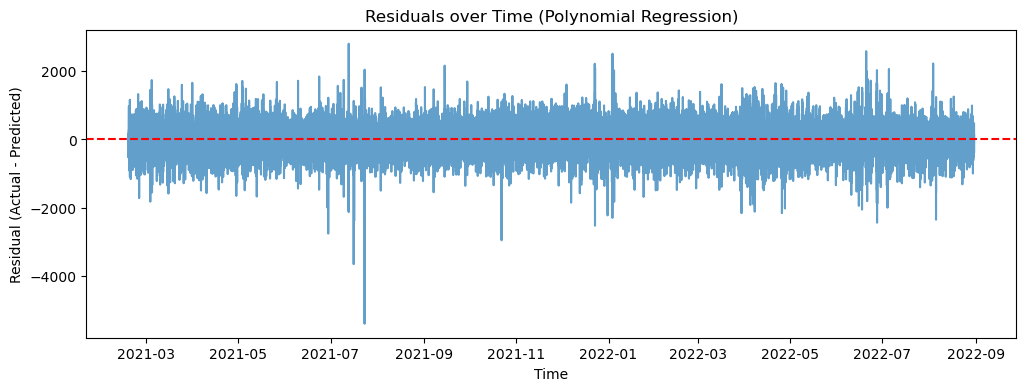

In [28]:
# Residuals
residuals = y_test - y_pred_poly
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(residuals.index, residuals.values, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals over Time (Polynomial Regression)")
plt.ylabel("Residual (Actual - Predicted)")
plt.xlabel("Time")
plt.show()


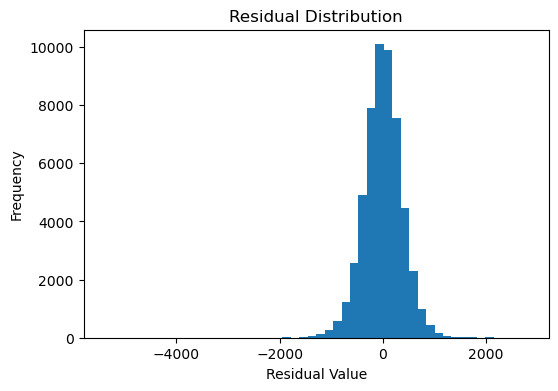

In [29]:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=50)
plt.title("Residual Distribution")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()


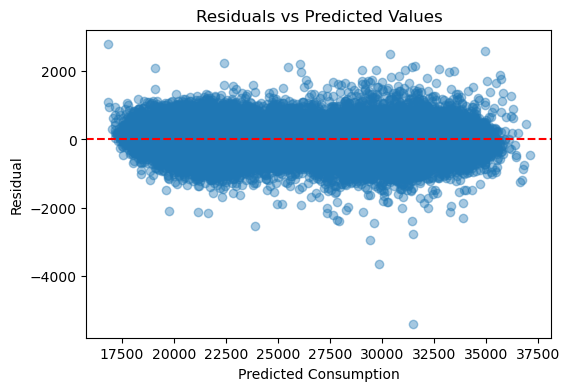

In [30]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred_poly, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Consumption")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted Values")
plt.show()


In [31]:
mean_residual = residuals.mean()
mean_residual


np.float64(-0.4807812007141322)

In [32]:
import pandas as pd

# Absolute residuals
abs_res = residuals.abs()

# Top failure cases (largest errors)
worst_idx = abs_res.sort_values(ascending=False).head(15).index

# From cleaned data (same index type as y_test)
failure_cleaned = df_cleaned.loc[worst_idx]

# From original (before preprocessing)
failure_original = df_original.loc[worst_idx]

# Build analysis table for the worst errors
analysis_df = pd.DataFrame({
    "absolute_error": abs_res.loc[worst_idx],
    "actual_consumption": y_test.loc[worst_idx],
    # Align predictions with the same index as y_test
    "predicted_consumption": pd.Series(y_pred_poly, index=y_test.index).loc[worst_idx]
})

# Add weather + context features from cleaned data (NEW COLUMN NAMES)
weather_cols = [
    "temperature_c", "humidity_pct", "rain_duration_min",
    "global_radiation_wm2", "wind_speed_ms", "pressure_hpa"
]

for col in weather_cols:
    analysis_df[col] = failure_cleaned[col]

analysis_df


absolute_error  actual_consumption  \
Timestamp                                                 
2021-07-23 12:30:00     5384.677393           26122.840   
2021-07-16 07:30:00     3643.321562           26234.726   
2021-10-22 04:45:00     2945.382170           26483.846   
2021-07-13 00:45:00     2799.428431           19613.799   
2021-06-29 11:30:00     2750.304742           28752.482   
2022-06-20 13:30:00     2581.079641           37544.920   
2021-12-23 01:15:00     2520.823049           21365.845   
2022-01-03 15:30:00     2508.163478           32886.443   
2022-06-27 17:45:00     2431.544610           27191.522   
2021-07-16 15:30:00     2376.882693           25555.013   
2021-07-16 08:45:00     2368.072591           29092.013   
2022-08-05 18:30:00     2344.668462           25498.567   
2022-01-03 13:45:00     2292.120730           31582.596   
2022-08-03 21:00:00     2221.950603           24621.347   
2021-12-31 09:00:00     2218.084699           25423.887   

                     predicted_consumption  temperature_c  humidity_pct  \
Timestamp                                                                 
2021-07-23 12:30:00           31507.517393          28.62         34.78   
2021-07-16 07:30:00           29878.047562          16.80         86.84   
2021-10-22 04:45:00           29429.228170          11.23         76.86   
2021-07-13 00:45:00           16814.370569          17.82         89.05   
2021-06-29 11:30:00           31502.786742          18.06         77.60   
2022-06-20 13:30:00           34963.840359          32.18         27.30   
2021-12-23 01:15:00           23886.668049          -1.77         81.76   
2022-01-03 15:30:00           30378.279522          11.70         56.80   
2022-06-27 17:45:00           29623.066610          18.29         82.66   
2021-07-16 15:30:00           27931.895693          20.16         65.96   
2021-07-16 08:45:00           31460.085591          17.71         82.17   
2022-08-05 18:30:00           27843.235462          22.89         78.94   
2022-01-03 13:45:00           33874.716730          12.03         54.88   
2022-08-03 21:00:00           22399.396397          27.00         49.71   
2021-12-31 09:00:00           27641.971699           8.72         80.50   

                     rain_duration_min  global_radiation_wm2  wind_speed_ms  \
Timestamp                                                                     
2021-07-23 12:30:00                0.0                822.53           1.72   
2021-07-16 07:30:00                0.0                254.82           0.68   
2021-10-22 04:45:00                0.0                  0.06           0.98   
2021-07-13 00:45:00                0.0                  0.04           0.92   
2021-06-29 11:30:00                0.0                 60.70           3.40   
2022-06-20 13:30:00                0.0                729.32           3.14   
2021-12-23 01:15:00                0.0                  0.02           0.61   
2022-01-03 15:30:00                0.0                  4.54           1.88   
2022-06-27 17:45:00                0.0                 13.78           1.90   
2021-07-16 15:30:00                0.0                301.77           1.77   
2021-07-16 08:45:00                0.0                303.99           0.89   
2022-08-05 18:30:00                0.0                  1.74           2.44   
2022-01-03 13:45:00                0.0                 66.39           2.16   
2022-08-03 21:00:00                0.0                  0.03           1.47   
2021-12-31 09:00:00                0.0                241.66           1.18   

                     pressure_hpa  
Timestamp                          
2021-07-23 12:30:00        963.71  
2021-07-16 07:30:00        968.26  
2021-10-22 04:45:00        966.70  
2021-07-13 00:45:00        959.87  
2021-06-29 11:30:00        963.66  
2022-06-20 13:30:00        961.52  
2021-12-23 01:15:00        970.50  
2022-01-03 15:30:00        966.15  
2022-06-27 17:45:00        971.21  
2

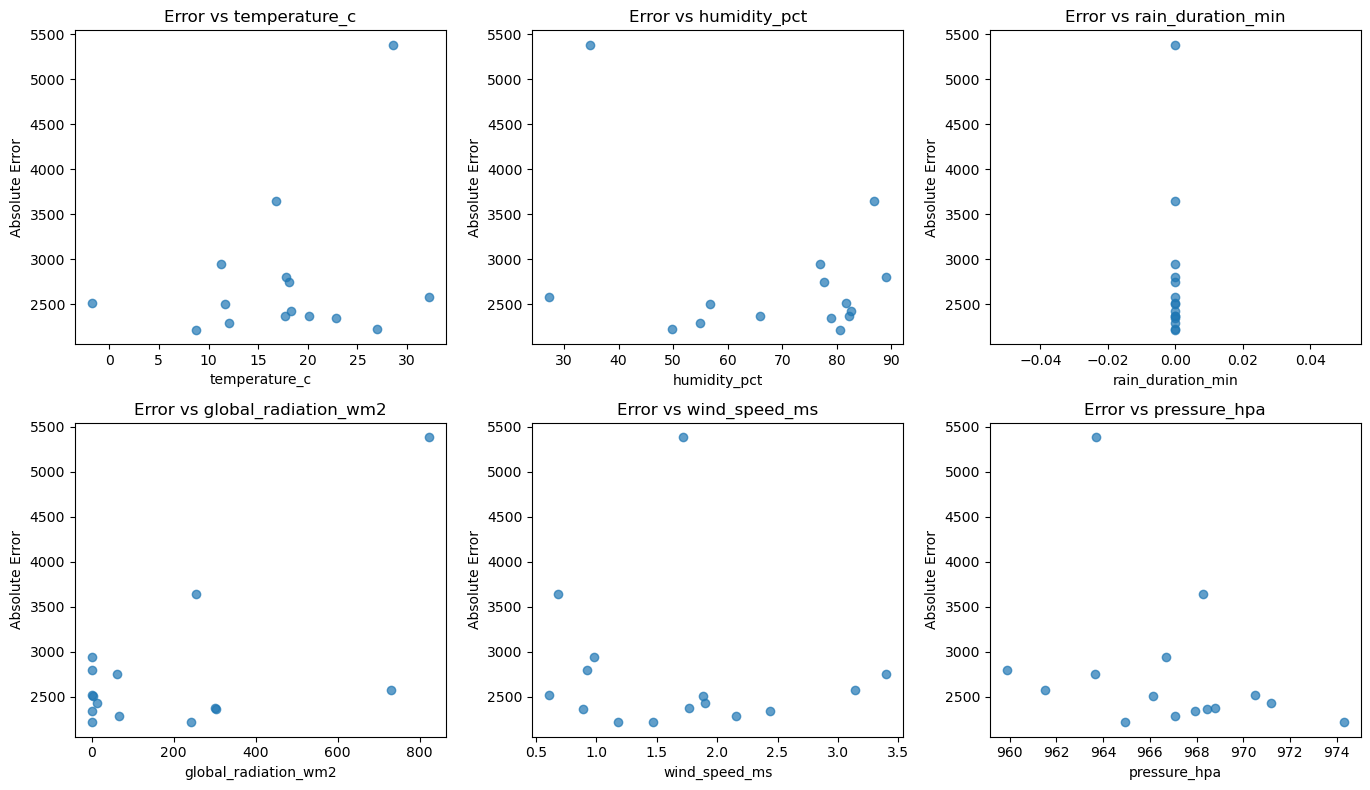

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(14,8))
axes = axes.flatten()

for ax, col in zip(axes, weather_cols):
    ax.scatter(
        analysis_df[col],
        analysis_df["absolute_error"],
        alpha=0.7
    )
    ax.set_xlabel(col)
    ax.set_ylabel("Absolute Error")
    ax.set_title(f"Error vs {col}")

plt.tight_layout()
plt.show()


## 2.6.1 PCA Projection and Interpretation

- PCA applied on standardized features
- Explained variance and cumulative variance reported
- PC1 vs PC2 projection used to check separations/clusters
- Loadings used to identify the most influential variables


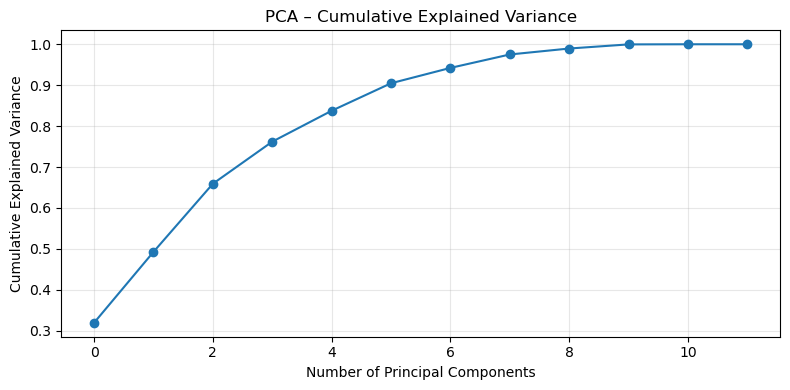

PC  Explained_Variance  Cumulative
0    PC1            0.319484    0.319484
1    PC2            0.173150    0.492634
2    PC3            0.166529    0.659163
3    PC4            0.102813    0.761977
4    PC5            0.075535    0.837511
5    PC6            0.067203    0.904715
6    PC7            0.037501    0.942216
7    PC8            0.032807    0.975023
8    PC9            0.014565    0.989588
9   PC10            0.010077    0.999665
10  PC11            0.000335    1.000000
11  PC12            0.000000    1.000000

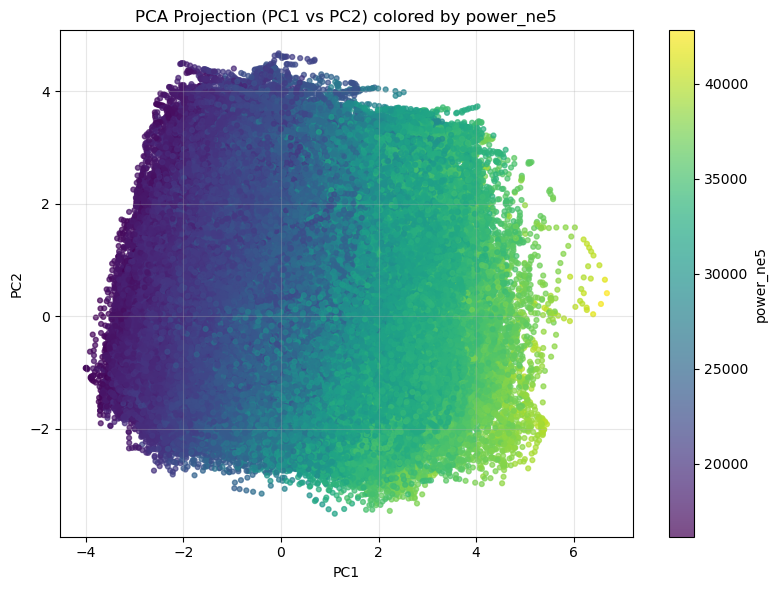

PC1       PC2       PC3
power_ne5             0.499725 -0.135679 -0.153141
power_ne7             0.458692 -0.068139 -0.213878
humidity_pct         -0.251349 -0.092312 -0.519899
rain_duration_min    -0.000000 -0.000000 -0.000000
global_radiation_wm2  0.313634 -0.016196  0.430033
temperature_c         0.143146 -0.040136  0.589007
wind_direction_deg    0.034082 -0.022559 -0.000746
wind_speed_ms         0.149805  0.647174 -0.080779
wind_velocity_ms      0.152940  0.627552 -0.111257
pressure_hpa         -0.020434 -0.315631  0.020953
smoothed_1h           0.504462 -0.132726 -0.150779
rolling_24h           0.236538 -0.190133 -0.294234

Top features for PC1:
smoothed_1h             0.504462
power_ne5               0.499725
power_ne7               0.458692
global_radiation_wm2    0.313634
humidity_pct            0.251349
rolling_24h             0.236538
Name: PC1, dtype: float64

Top features for PC2:
wind_speed_ms       0.647174
wind_velocity_ms    0.627552
pressure_hpa        0.315631
rolling_24h         0.190133
power_ne5           0.135679
smoothed_1h         0.132726
Name: PC2, dtype: float64


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -----------------------------
# 0) Ensure smoothed features exist (create if missing)
# -----------------------------
target = "power_ne5"
if "smoothed_1h" not in df_cleaned.columns:
    df_cleaned["smoothed_1h"] = df_cleaned[target].rolling(window=4).mean()   # 1 hour (4×15min)
if "rolling_24h" not in df_cleaned.columns:
    df_cleaned["rolling_24h"] = df_cleaned[target].rolling(window=96).mean()  # 24 hours

# -----------------------------
# 1) Select features from df_cleaned (NEW NAMES)
# -----------------------------
features = [
    "power_ne5", "power_ne7",
    "humidity_pct", "rain_duration_min", "global_radiation_wm2",
    "temperature_c", "wind_direction_deg", "wind_speed_ms", "wind_velocity_ms",
    "pressure_hpa",
    "smoothed_1h", "rolling_24h"
]

# Keep only rows with all selected features available
X = df_cleaned[features].dropna()

# -----------------------------
# 2) Standardize (important for PCA)
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3) PCA (all components) to get explained variance
# -----------------------------
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

# Plot cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(cum_explained, marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Cumulative Explained Variance")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Explained variance table
ev_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained))],
    "Explained_Variance": explained,
    "Cumulative": cum_explained
})
display(ev_df)

# -----------------------------
# 4) PCA projection to 2D (PC1 vs PC2)
# -----------------------------
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

df_pca2 = pd.DataFrame(X_pca_2, columns=["PC1", "PC2"], index=X.index)

# Color by a meaningful variable (power_ne5)
color_values = X["power_ne5"].values

plt.figure(figsize=(8, 6))
sc = plt.scatter(df_pca2["PC1"], df_pca2["PC2"], c=color_values, s=12, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (PC1 vs PC2) colored by power_ne5")
plt.colorbar(sc, label="power_ne5")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# 5) Loadings (interpret PCs: which features contribute most)
# -----------------------------
loadings = pd.DataFrame(
    pca_full.components_.T,
    index=features,
    columns=[f"PC{i+1}" for i in range(len(features))]
)

display(loadings[["PC1", "PC2", "PC3"]])

# Top contributing features per PC (by absolute loading)
def top_features_for_pc(loadings_df, pc_name, top_k=6):
    return loadings_df[pc_name].abs().sort_values(ascending=False).head(top_k)

print("Top features for PC1:")
print(top_features_for_pc(loadings, "PC1", top_k=6))

print("\nTop features for PC2:")
print(top_features_for_pc(loadings, "PC2", top_k=6))


## 2.6.2 t-SNE Embedding and Interpretation

- t-SNE used for nonlinear 2D embedding
- Perplexity set using a safe rule based on sample size
- Embedding colored by power consumption to inspect clustering/separation
- Visible clusters/gradients interpreted as different operating regimes


n_samples = 268610
perplexity chosen = 30
Subsampling: using 5000 points out of 268610


c:\Users\malne\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


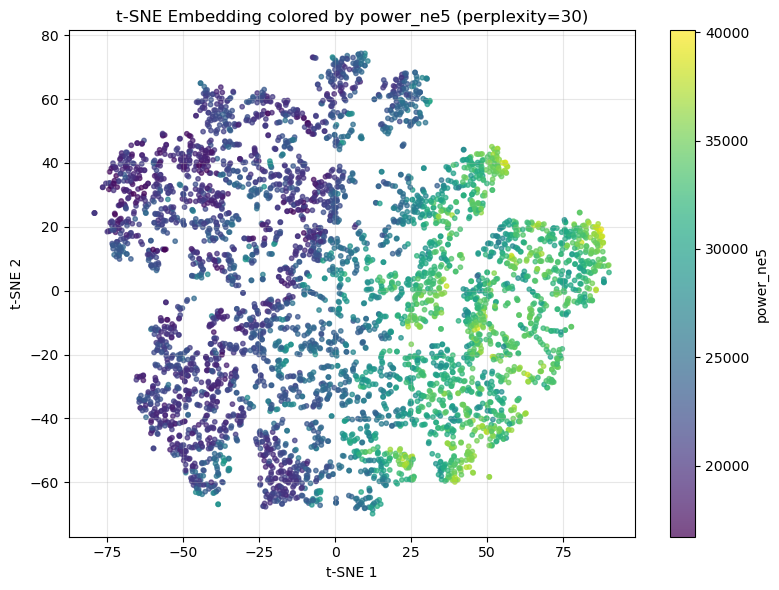

c:\Users\malne\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


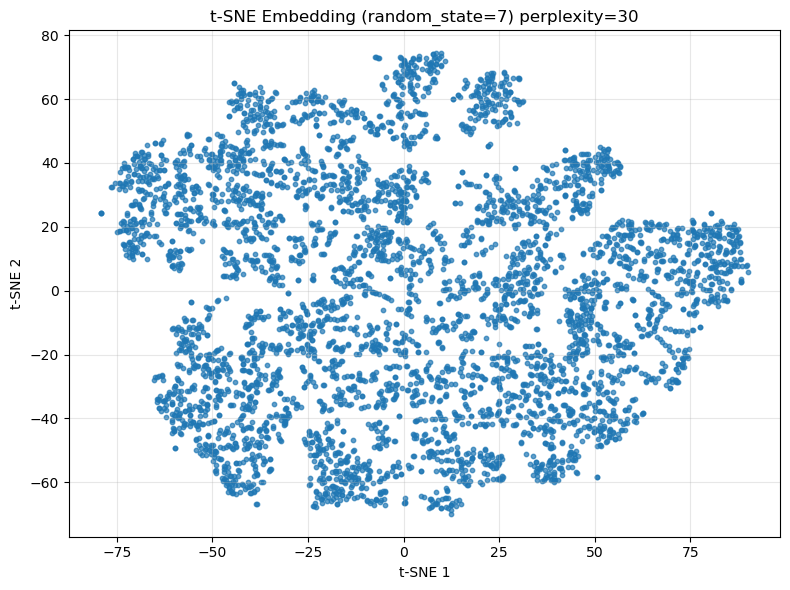

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# -------------------------------------------------------
# Assumptions:
# - X was created in the PCA step: X = df_cleaned[features].dropna()
# - X_scaled was created in the PCA step: X_scaled = scaler.fit_transform(X)
# - We have a column to color by (e.g., power_ne5)
# -------------------------------------------------------

# 1) Choose a reasonable perplexity automatically (safe + commonly used)
n_samples = X_scaled.shape[0]

# Rule of thumb: perplexity should be in [5, 50] and must be < n_samples
# Using ~30 works well for medium/large datasets
perplexity = int(np.clip(30, 5, min(50, n_samples - 1)))

print("n_samples =", n_samples)
print("perplexity chosen =", perplexity)

# 2) Optional: subsample for speed if the dataset is very large
# t-SNE can be slow for large n, so we limit the number of points for faster execution.
max_points = 5000
if n_samples > max_points:
    rng = np.random.RandomState(42)
    idx = rng.choice(n_samples, size=max_points, replace=False)
    X_tsne_input = X_scaled[idx]
    X_for_color = X.iloc[idx]
    print(f"Subsampling: using {max_points} points out of {n_samples}")
else:
    X_tsne_input = X_scaled
    X_for_color = X

# 3) Run t-SNE with justified hyperparameters
# - init='pca' makes the embedding more stable
# - learning_rate='auto' is recommended in newer sklearn versions
# - random_state ensures reproducibility
tsne = TSNE(
    n_components=2,
    perplexity=perplexity,
    init="pca",
    learning_rate="auto",
    n_iter=1500,
    random_state=42
)

X_emb = tsne.fit_transform(X_tsne_input)

# 4) Build a result dataframe
df_tsne = pd.DataFrame(X_emb, columns=["TSNE1", "TSNE2"])

# Choose the coloring variable (adjust if your column name differs)
color_col = "power_ne5"
if color_col not in X_for_color.columns:
    # Fallback: use the first available column
    color_col = X_for_color.columns[0]
    print("Color column not found; using:", color_col)

df_tsne[color_col] = X_for_color[color_col].values

# 5) Plot the embedding
plt.figure(figsize=(8, 6))
sc = plt.scatter(df_tsne["TSNE1"], df_tsne["TSNE2"], c=df_tsne[color_col], s=10, alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title(f"t-SNE Embedding colored by {color_col} (perplexity={perplexity})")
plt.colorbar(sc, label=color_col)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6) Optional stability check: run with a different random seed
# If the overall structure is similar, the embedding is more trustworthy.
tsne2 = TSNE(
    n_components=2,
    perplexity=perplexity,
    init="pca",
    learning_rate="auto",
    n_iter=1500,
    random_state=7
)

X_emb2 = tsne2.fit_transform(X_tsne_input)

plt.figure(figsize=(8, 6))
plt.scatter(X_emb2[:, 0], X_emb2[:, 1], s=10, alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title(f"t-SNE Embedding (random_state=7) perplexity={perplexity}")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 2.6.3 UMAP Embedding and Interpretation

- UMAP used for nonlinear 2D embedding
- n_neighbors and min_dist set with justified values
- Embedding colored by power consumption to inspect clustering/separation
- Clusters/gradients interpreted as structure in the feature space


In [36]:
!pip install umap-learn

n_samples = 268610
n_neighbors chosen = 30
min_dist chosen = 0.1
Subsampling: using 10000 points out of 268610


c:\Users\malne\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


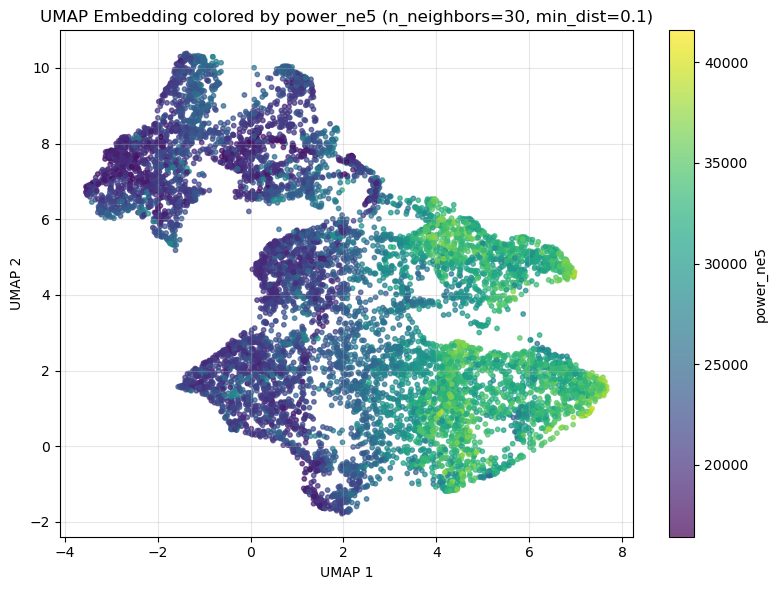

c:\Users\malne\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


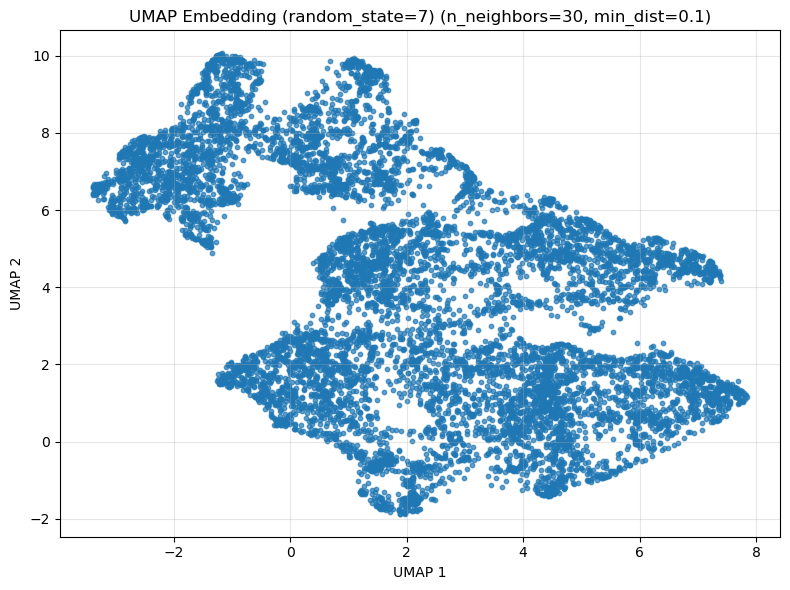

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# Assumptions (same as PCA/t-SNE step):
# - X was created in the PCA step: X = df_cleaned[features].dropna()
# - X_scaled was created in the PCA step: X_scaled = scaler.fit_transform(X)
# - We color the embedding by power_ne5
# -------------------------------------------------------

# Try importing UMAP (package name: umap-learn)
try:
    from umap import UMAP
except ImportError:
    raise ImportError(
        "UMAP is not installed. Install it using:\n"
        "pip install umap-learn"
    )

# -----------------------------
# 1) Choose justified hyperparameters
# -----------------------------
n_samples = X_scaled.shape[0]

# n_neighbors controls local vs global structure:
# - smaller values focus on local neighborhoods
# - larger values preserve more global structure
# Rule of thumb: 10..50, and must be < n_samples
n_neighbors = int(np.clip(30, 10, min(50, n_samples - 1)))

# min_dist controls how tightly points are packed:
# - smaller => tighter clusters (more separation)
# - larger => smoother, more continuous structure
min_dist = 0.1

print("n_samples =", n_samples)
print("n_neighbors chosen =", n_neighbors)
print("min_dist chosen =", min_dist)

# -----------------------------
# 2) Optional subsample for speed (similar to t-SNE)
# -----------------------------
max_points = 10000
if n_samples > max_points:
    rng = np.random.RandomState(42)
    idx = rng.choice(n_samples, size=max_points, replace=False)
    X_umap_input = X_scaled[idx]
    X_for_color = X.iloc[idx]
    print(f"Subsampling: using {max_points} points out of {n_samples}")
else:
    X_umap_input = X_scaled
    X_for_color = X

# -----------------------------
# 3) Fit UMAP embedding
# -----------------------------
umap_model = UMAP(
    n_components=2,
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    metric="euclidean",
    random_state=42
)

X_umap = umap_model.fit_transform(X_umap_input)

df_umap = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"], index=X_for_color.index)

# Choose coloring variable
color_col = "power_ne5"
if color_col not in X_for_color.columns:
    color_col = X_for_color.columns[0]
    print("Color column not found; using:", color_col)

df_umap[color_col] = X_for_color[color_col].values

# -----------------------------
# 4) Plot UMAP embedding
# -----------------------------
plt.figure(figsize=(8, 6))
sc = plt.scatter(df_umap["UMAP1"], df_umap["UMAP2"], c=df_umap[color_col], s=10, alpha=0.7)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(f"UMAP Embedding colored by {color_col} (n_neighbors={n_neighbors}, min_dist={min_dist})")
plt.colorbar(sc, label=color_col)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# 5) (Optional) Quick stability check with another seed
# -----------------------------
umap_model2 = UMAP(
    n_components=2,
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    metric="euclidean",
    random_state=7
)

X_umap2 = umap_model2.fit_transform(X_umap_input)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap2[:, 0], X_umap2[:, 1], s=10, alpha=0.7)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(f"UMAP Embedding (random_state=7) (n_neighbors={n_neighbors}, min_dist={min_dist})")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
